##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit account (dependent variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Project Description:
The project (Code) analyzes the prior marketing campaign data of a Portugeuse bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

Comments and Explanations (in the form of Markdown) are included in the notebook to improve the readability of the code, to explain the rationale of doing certain steps and to discuss the results and inferences from the executed code.


###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). BE VERY CAREFUL WITH THIS FIELD. Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install xgboost
# %pip install plotnine
# %pip install mlxtend

from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print('LOAD DURATION: ', datetime.now() - start_time) # load time about a minute

LOAD DURATION:  0:00:02.519800


In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

In [4]:
# take a look at the type, number of columns, entries, null values etc..
data.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.nunique(0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
# Summary statistics
summary = pd.DataFrame(index = data.columns)
summary['Data type'] = data.dtypes.values
summary['# Nonnull records'] = data.count().values
summary['# Non-zero records'] = data.astype(bool).sum(axis=0)
summary['% Populated'] = round(data.count()/data.shape[0]*100,2)
summary['# Unique values'] = data.nunique().values
summary['Mean'] = round(data.mean(),2)
summary['Std'] = round(data.std(),2)
# summary['Min'] = round(data.min(),2)
# summary['Max'] = round(data.max(),2)
summary

,Data type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std
age,int64,41188,41188,100.0,78,40.02,10.42
job,object,41188,41188,100.0,12,NaN,NaN
marital,object,41188,41188,100.0,4,NaN,NaN
education,object,41188,41188,100.0,8,NaN,NaN
default,object,41188,41188,100.0,3,NaN,NaN
housing,object,41188,41188,100.0,3,NaN,NaN
loan,object,41188,41188,100.0,3,NaN,NaN
contact,object,41188,41188,100.0,2,NaN,NaN
month,object,41188,41188,100.0,10,NaN,NaN
day_of_week,object,41188,41188,100.0,5,NaN,NaN


In [7]:
categorical_fields = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_fields = ['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_fields].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.shape

(41188, 21)

In [10]:
data_duplicates = data[data.duplicated(keep='last')]
data_duplicates.shape

(12, 21)

In [11]:
data.drop_duplicates(inplace=True)
data.shape

(41176, 21)

In [12]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
Y = pd.DataFrame(data['y'])

In [13]:
Y.rename(columns={'y':'label'}, inplace=True)

In [14]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [15]:
data['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [16]:
goods = data[data['y'] == 1]
bads = data[data['y'] == 0]
num_goods = len(goods)
num_bads = len(bads)
rate = num_goods / len(data)
print('overall response rate is: ', rate)

overall response rate is:  0.11266271614532737


In [17]:
s = pd.Series(np.ones(1000))

(array([5.000e+00, 2.800e+01, 4.200e+01, 6.500e+01, 1.020e+02, 1.370e+02,
        2.260e+02, 4.620e+02, 5.980e+02, 6.980e+02, 8.500e+02, 1.001e+03,
        1.453e+03, 1.714e+03, 1.947e+03, 1.845e+03, 1.833e+03, 1.745e+03,
        1.758e+03, 1.779e+03, 1.475e+03, 1.407e+03, 1.430e+03, 1.161e+03,
        1.277e+03, 1.142e+03, 1.055e+03, 1.011e+03, 1.102e+03, 1.030e+03,
        9.270e+02, 9.790e+02, 8.390e+02, 8.750e+02, 7.540e+02, 7.790e+02,
        7.330e+02, 6.840e+02, 6.470e+02, 7.040e+02, 6.460e+02, 5.760e+02,
        4.630e+02, 2.830e+02, 7.300e+01, 6.200e+01, 5.500e+01, 5.700e+01,
        4.400e+01, 5.700e+01, 2.600e+01, 3.300e+01, 3.400e+01, 4.700e+01,
        5.200e+01, 3.400e+01, 3.400e+01, 3.200e+01, 2.400e+01, 3.400e+01,
        2.000e+01, 2.700e+01, 1.400e+01, 3.100e+01, 2.000e+01, 1.700e+01,
        1.700e+01, 7.000e+00, 1.500e+01, 8.000e+00, 1.000e+00, 2.200e+01,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+0

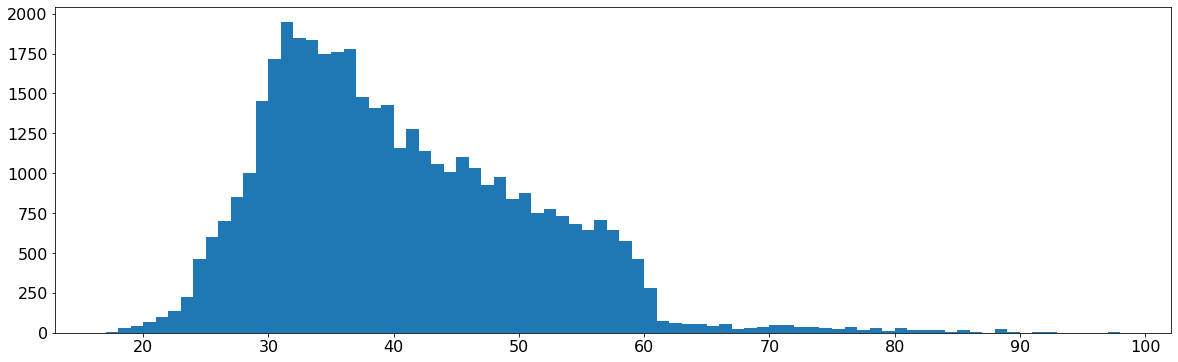

In [18]:
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})
plt.hist(data['age'], bins=81)

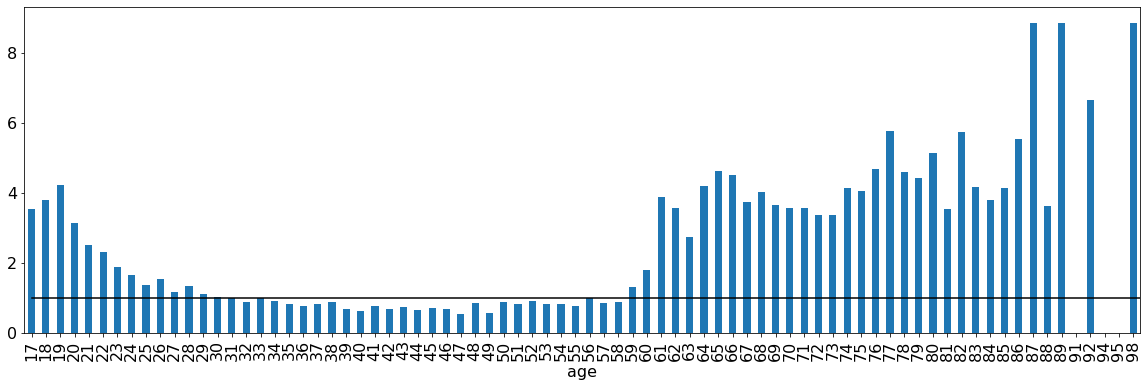

In [19]:
temp = data.groupby('age')['y'].mean(0) / rate
s.plot.line(color='black')
temp.plot(kind='bar')

In [20]:
plot_cols = data.columns.tolist()
print(plot_cols)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


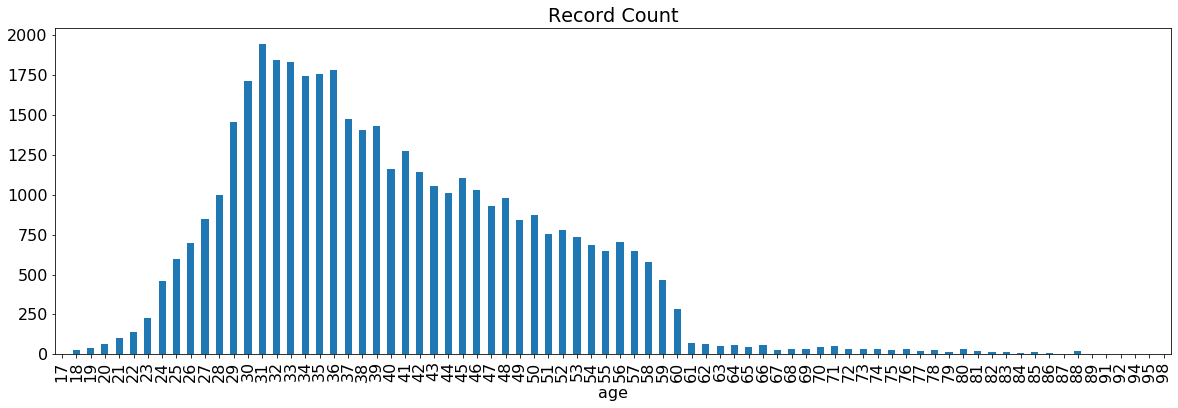

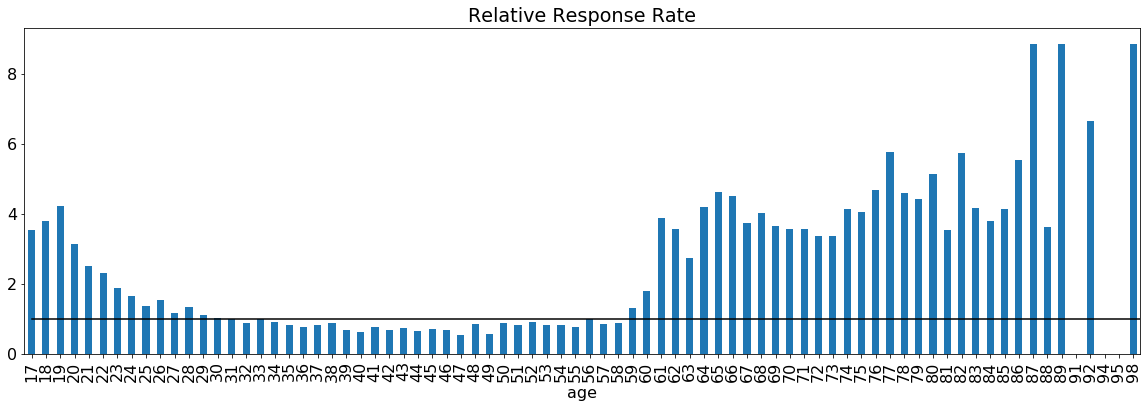

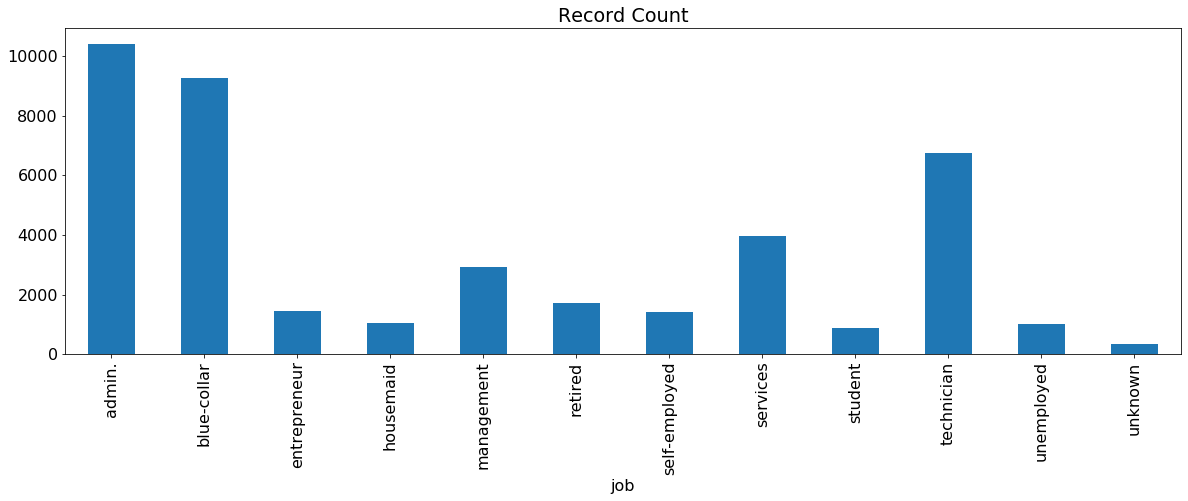

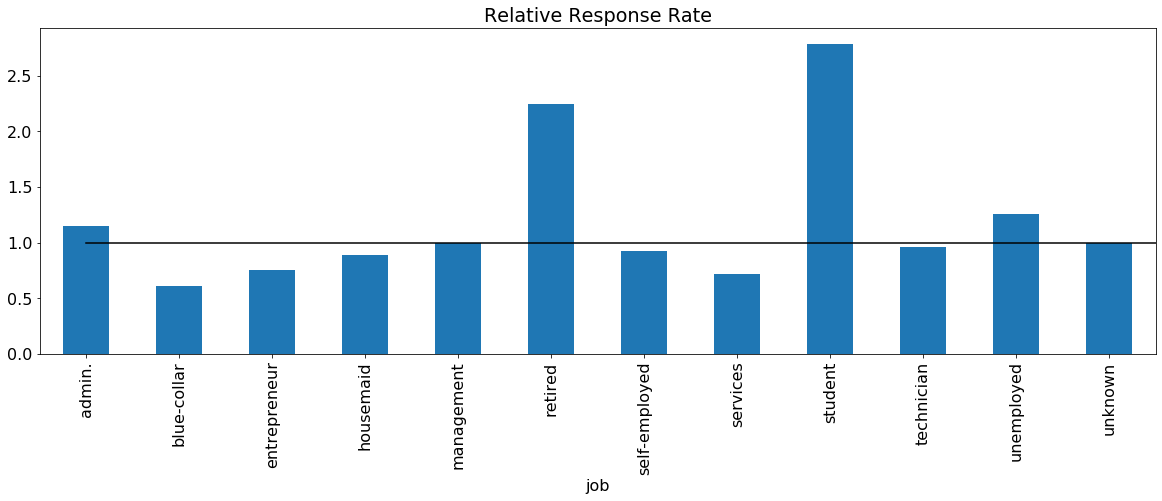

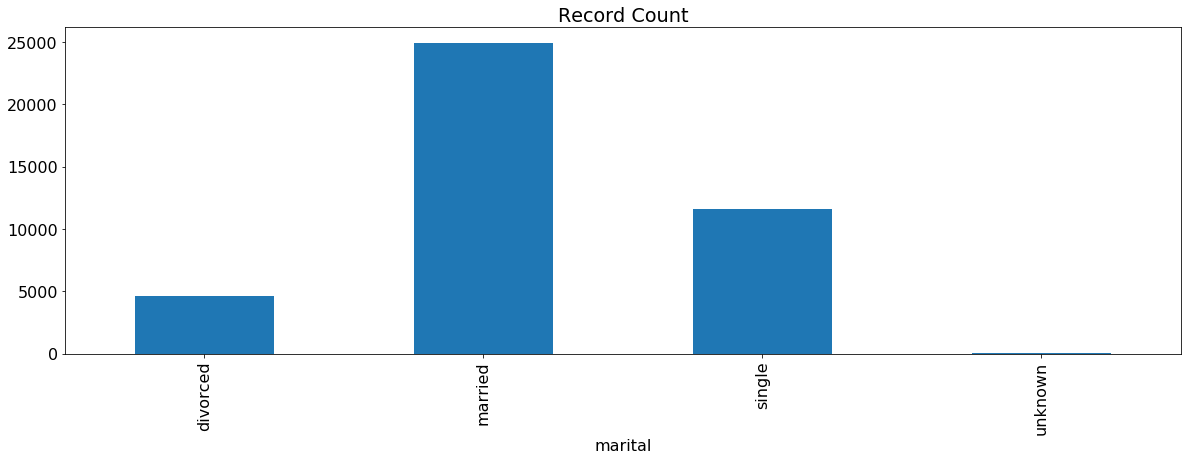

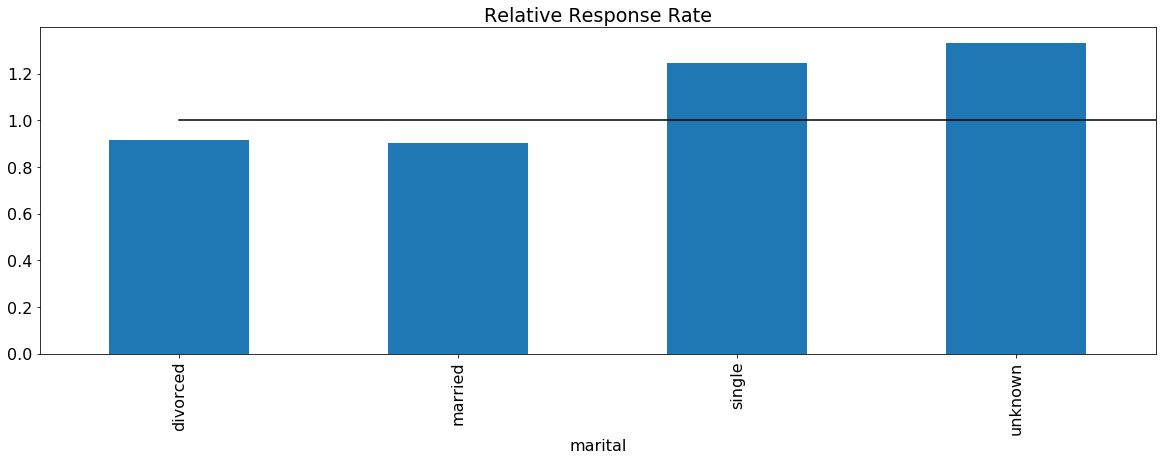

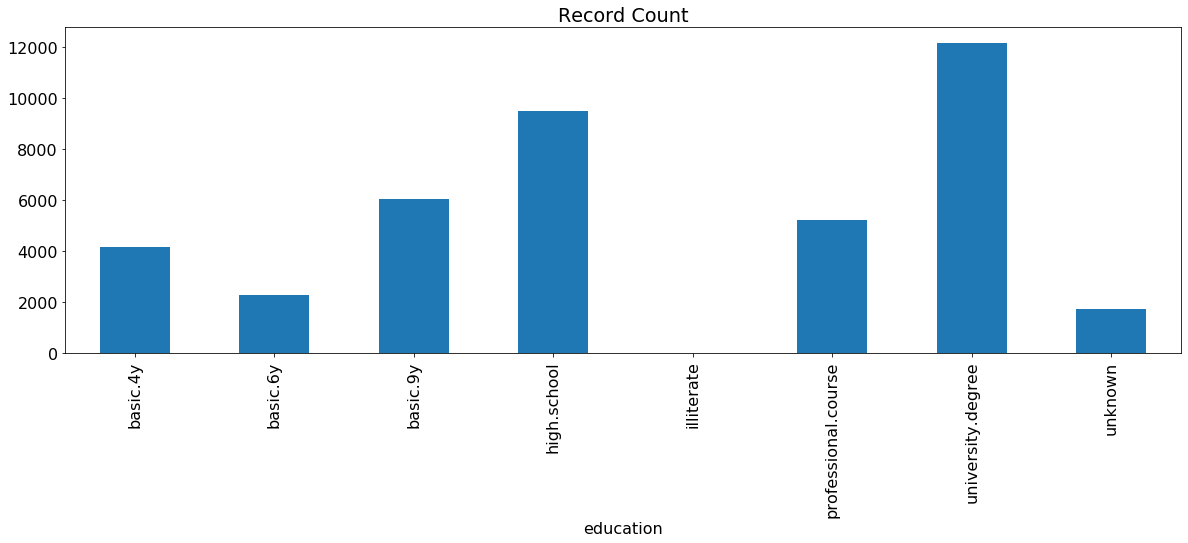

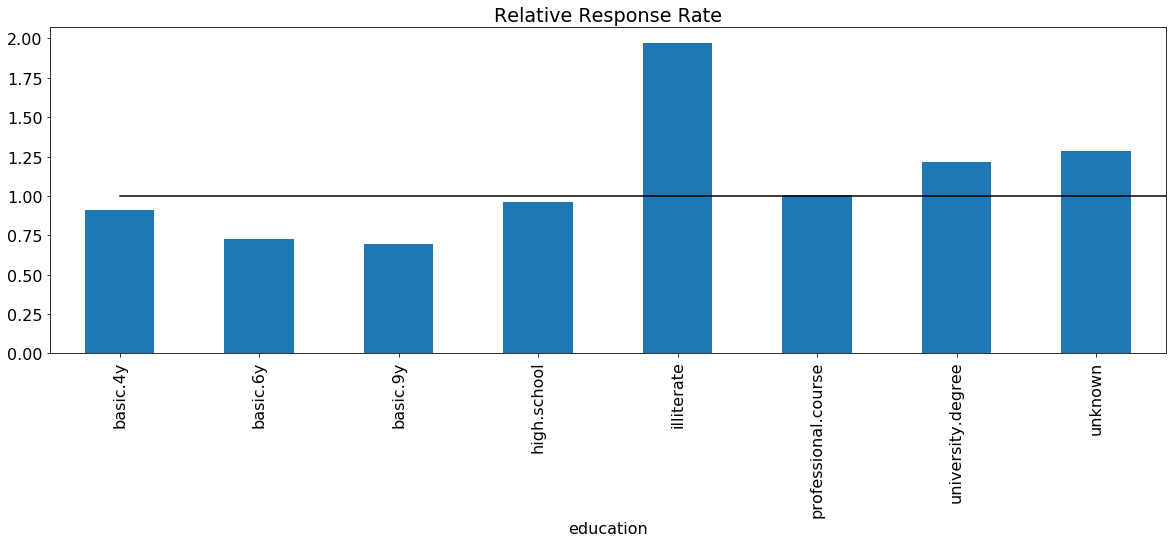

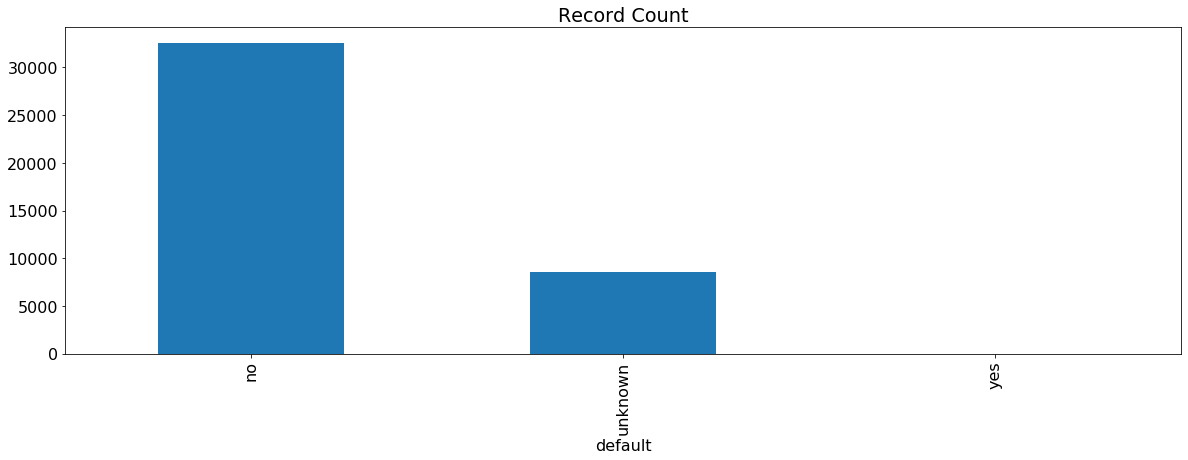

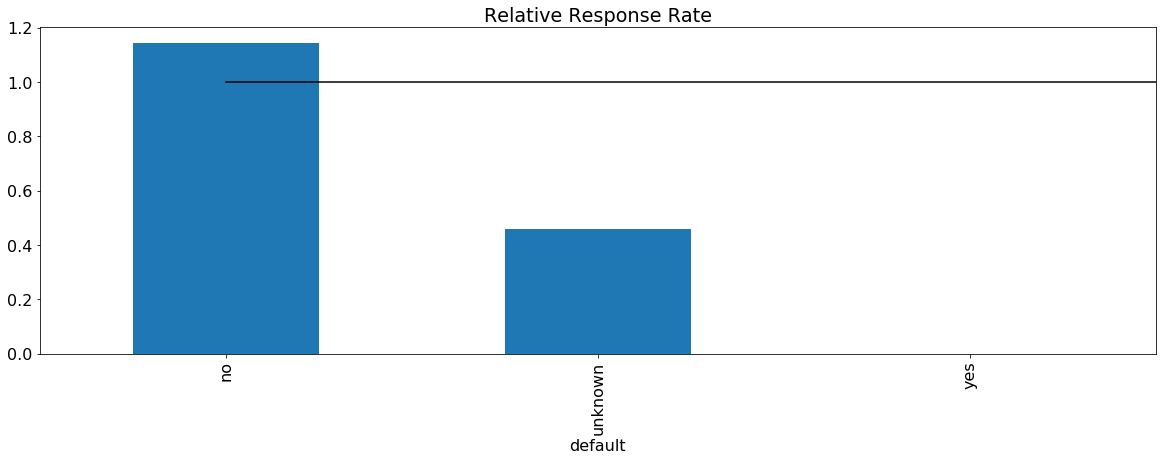

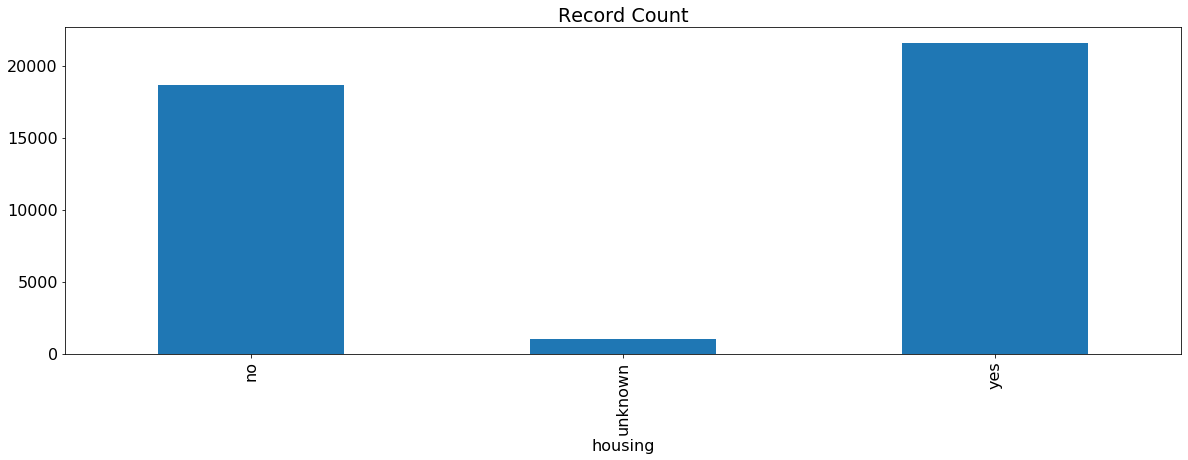

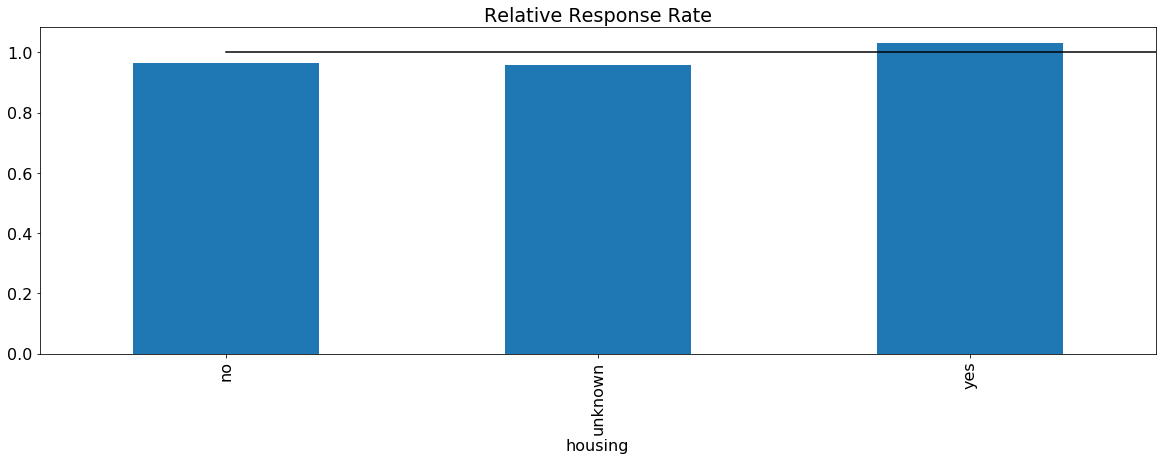

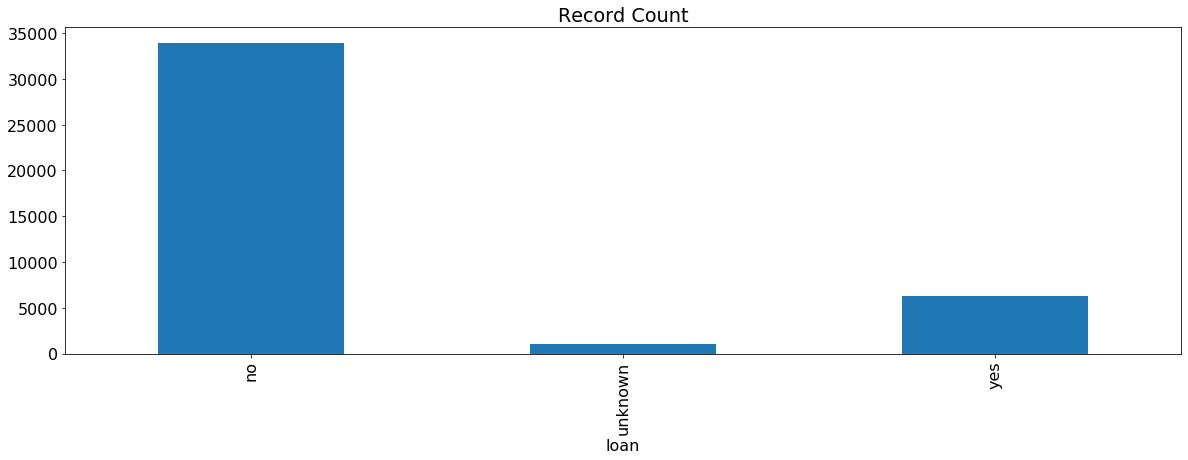

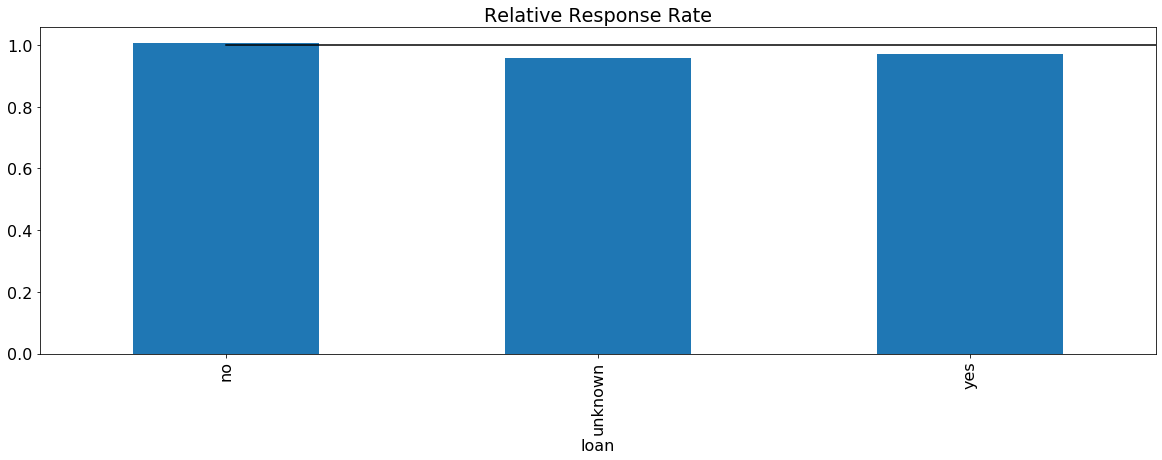

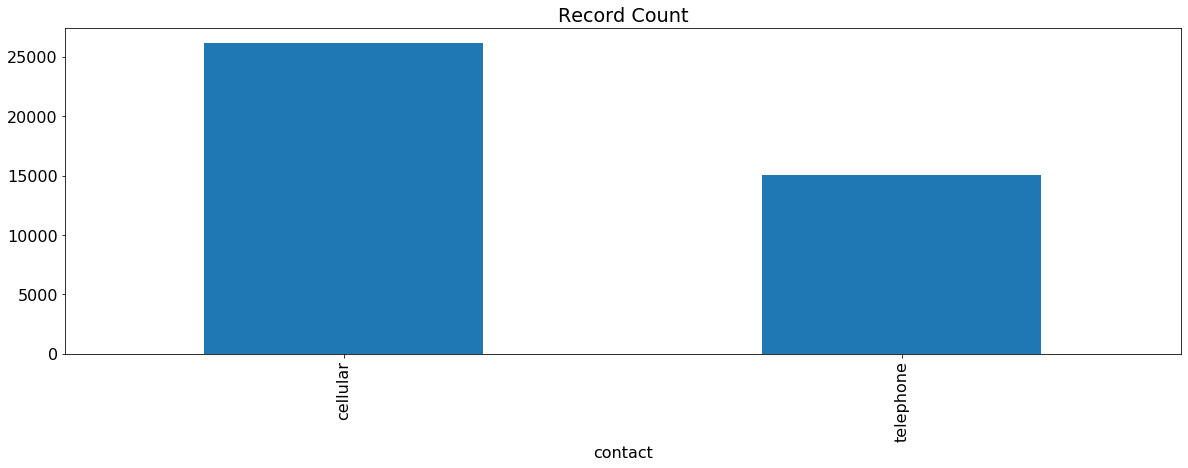

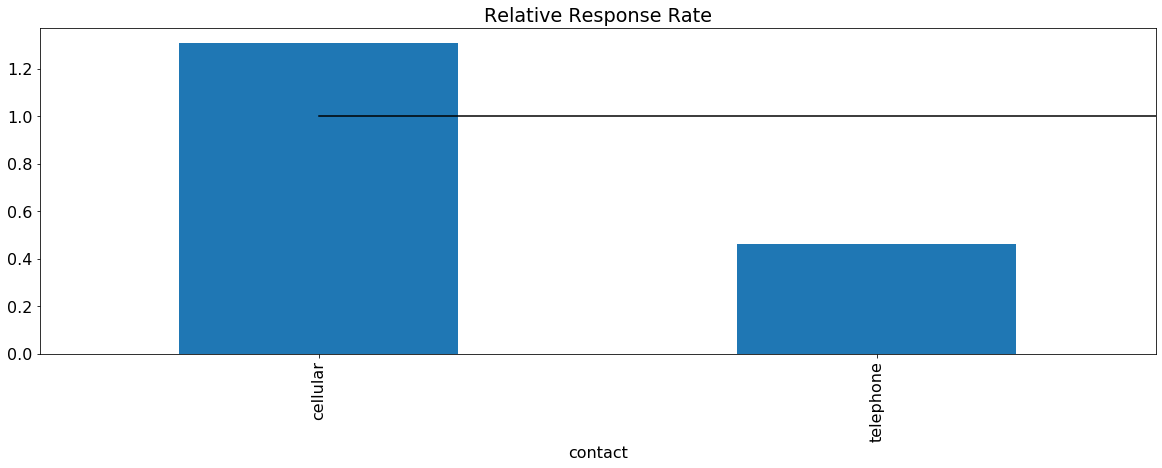

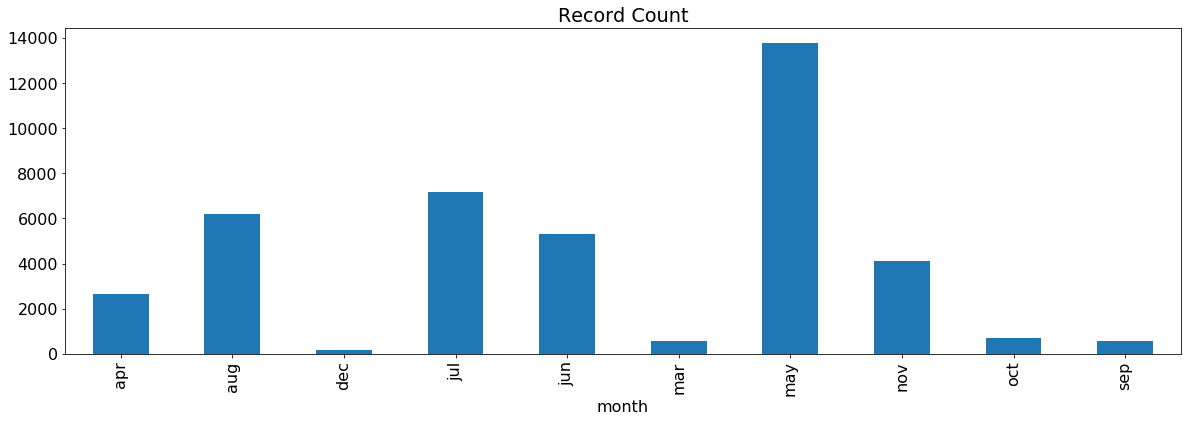

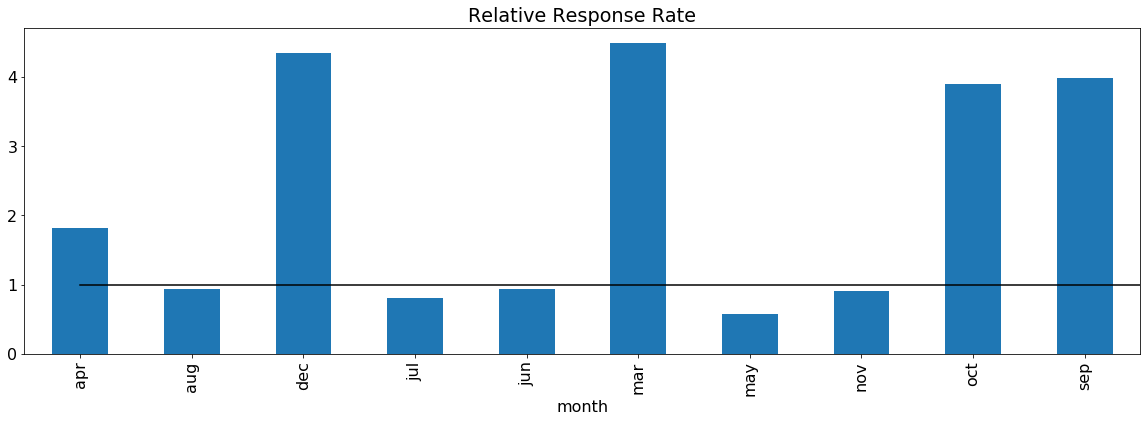

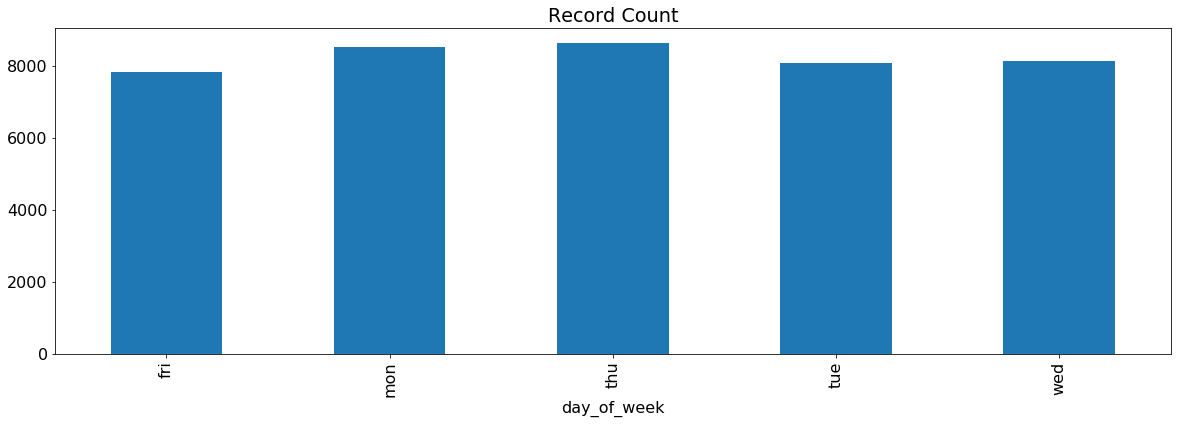

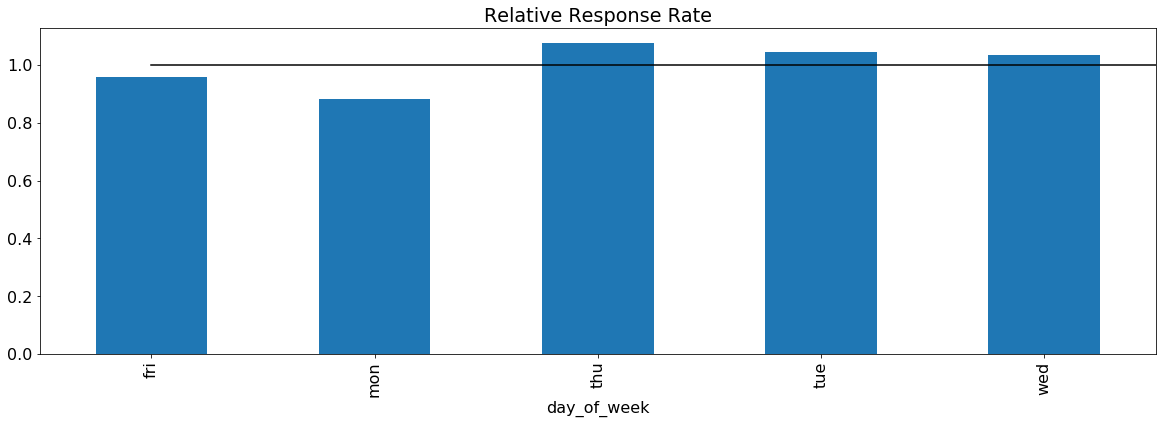

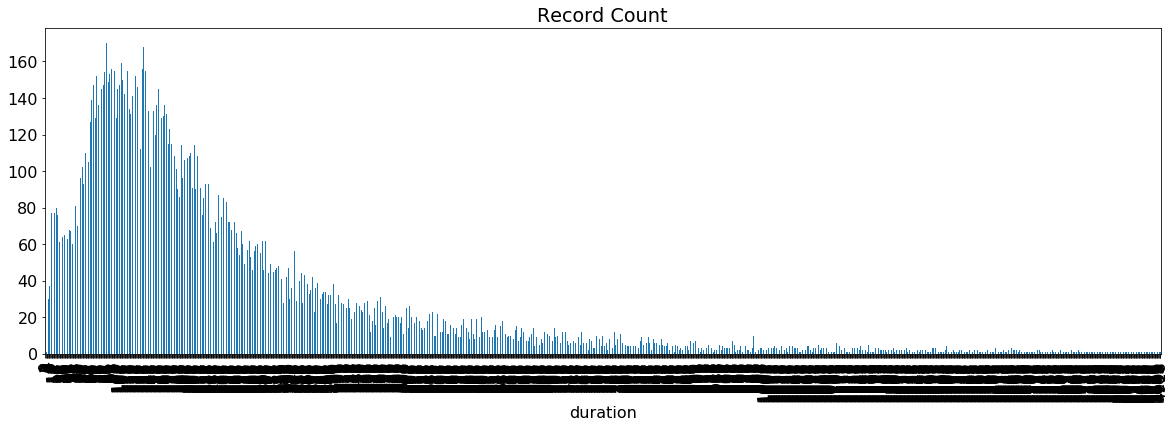

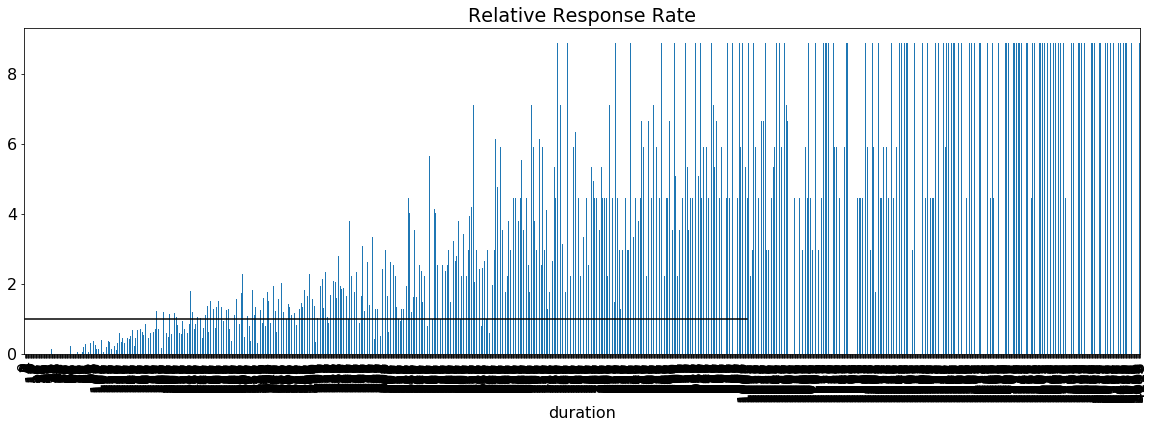

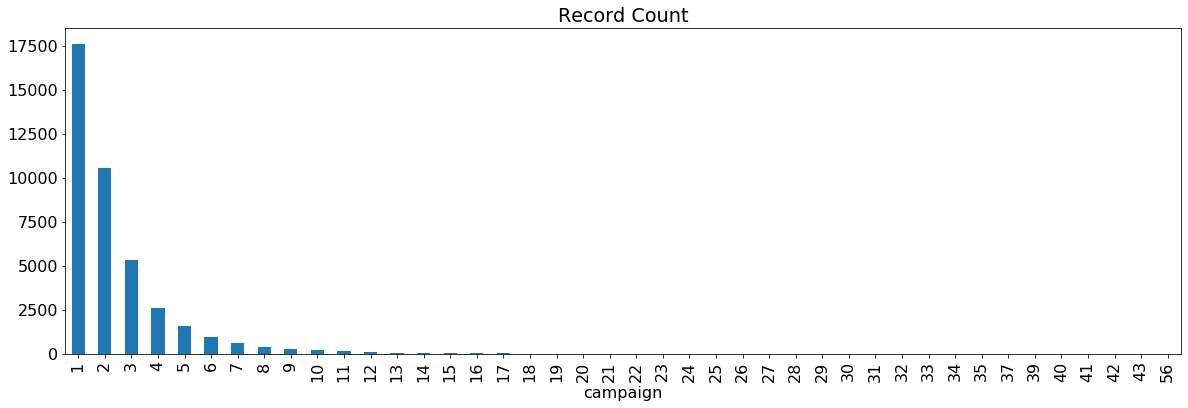

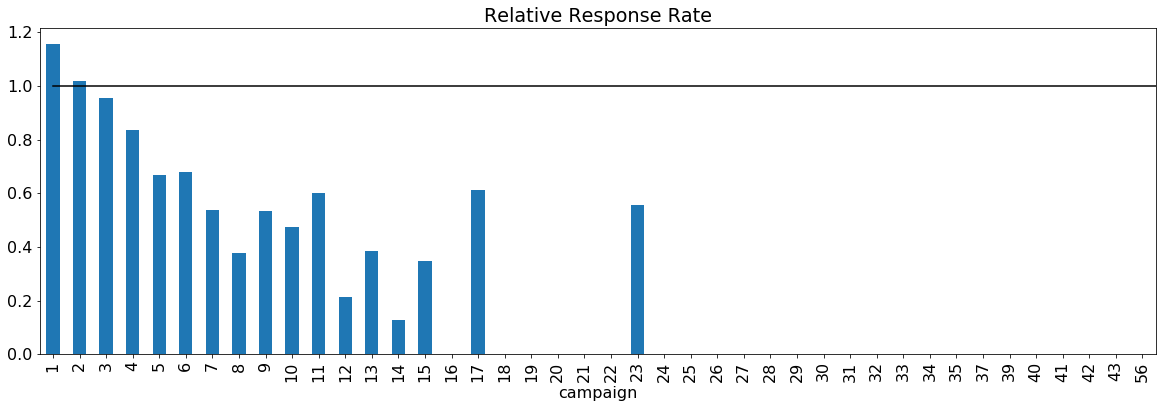

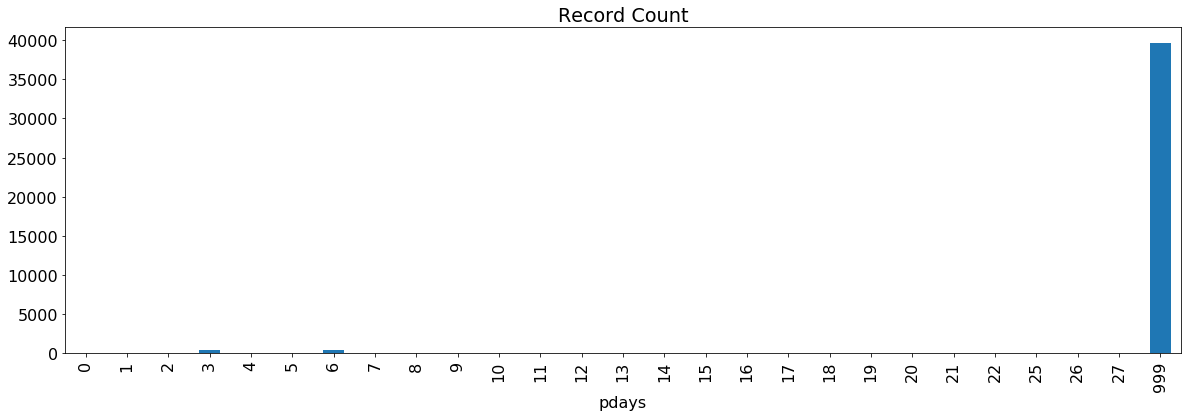

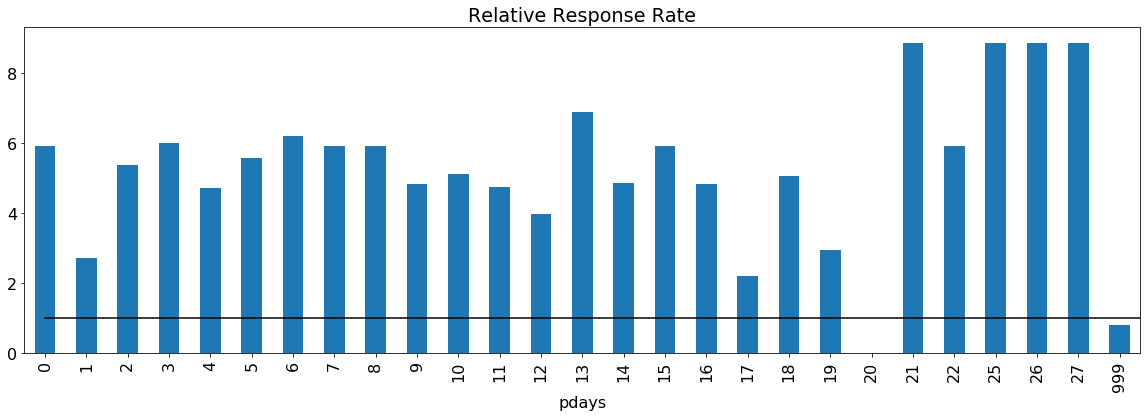

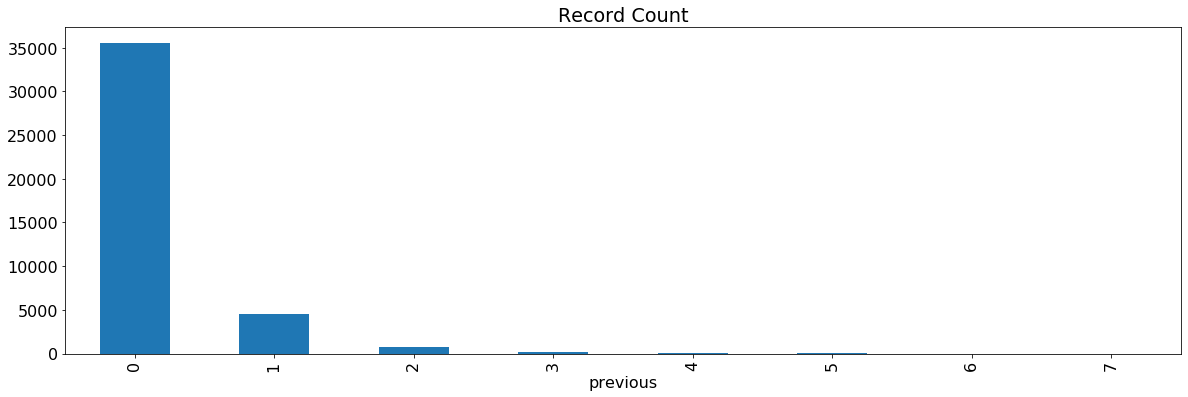

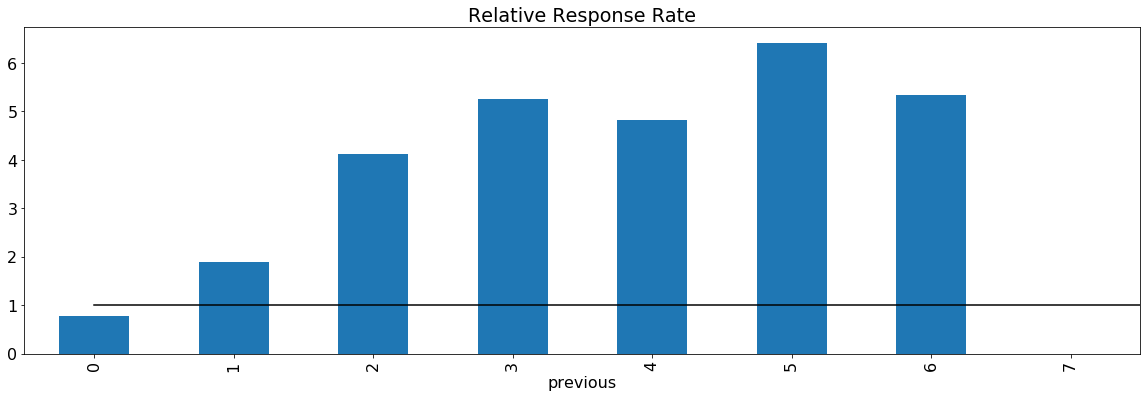

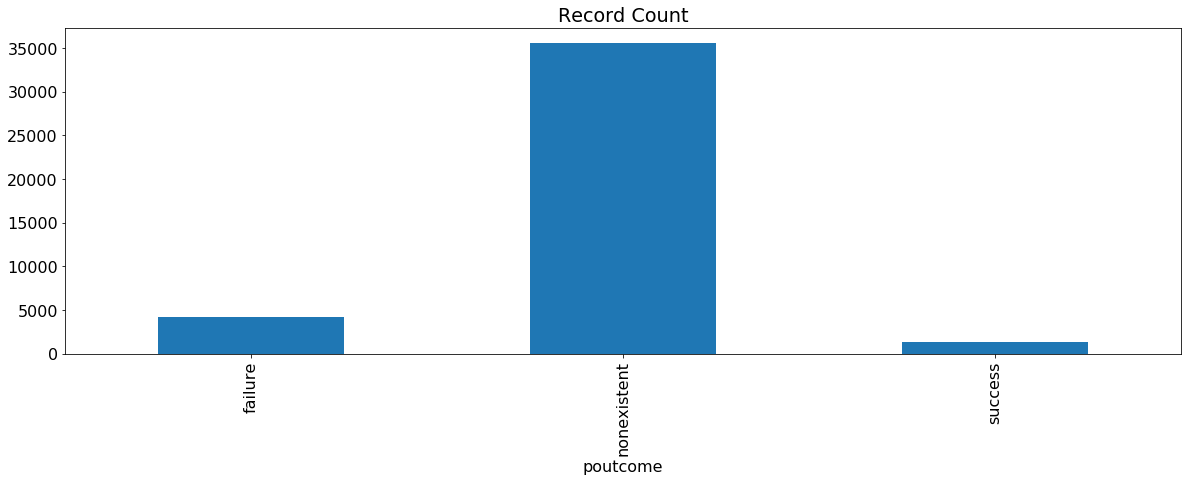

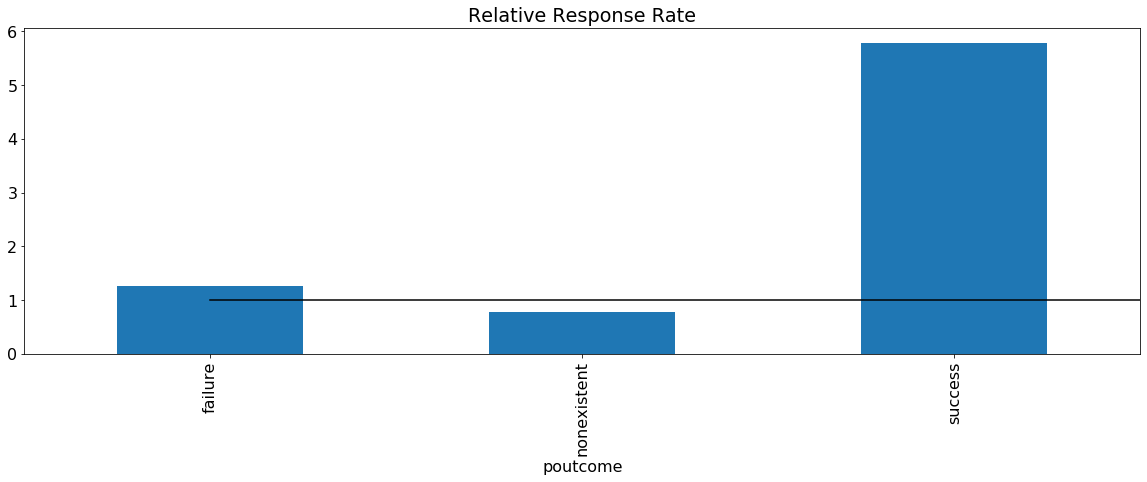

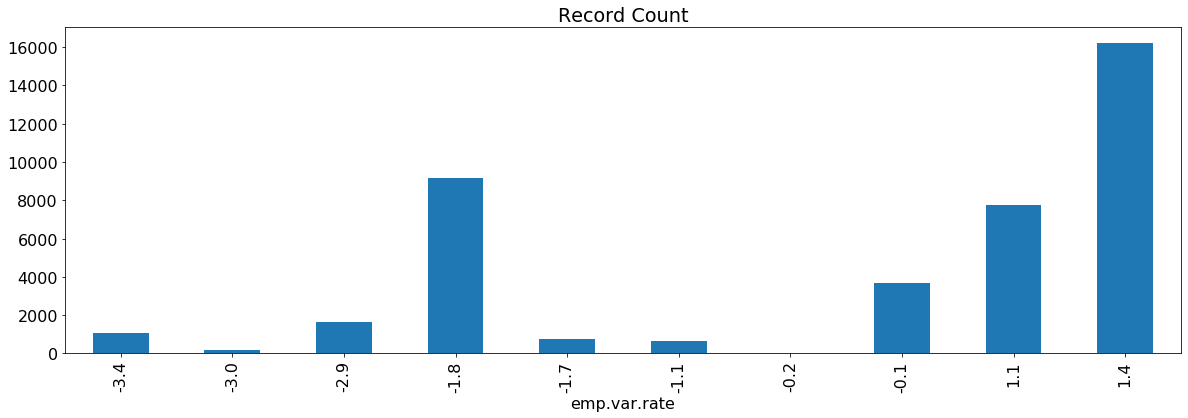

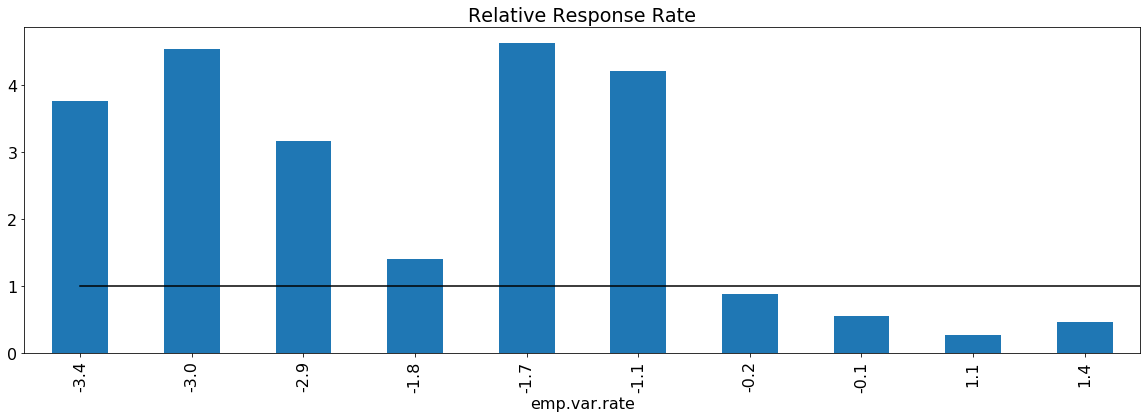

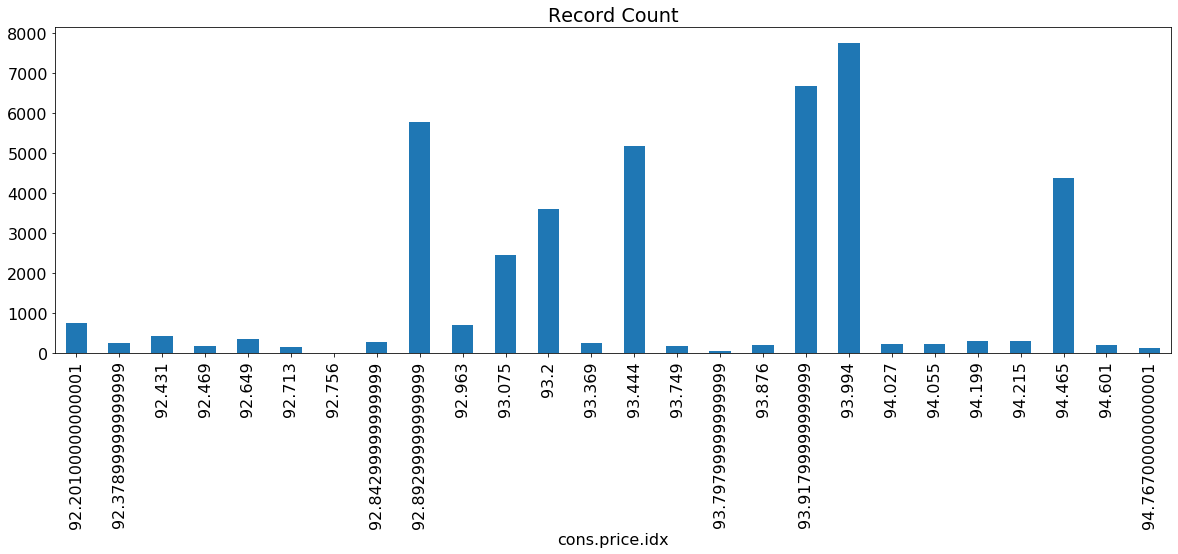

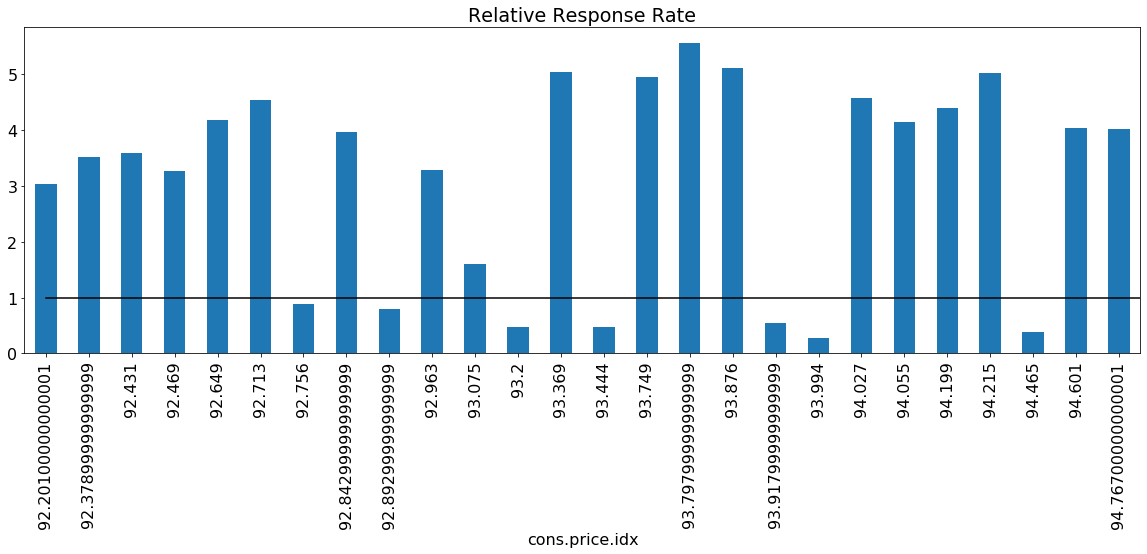

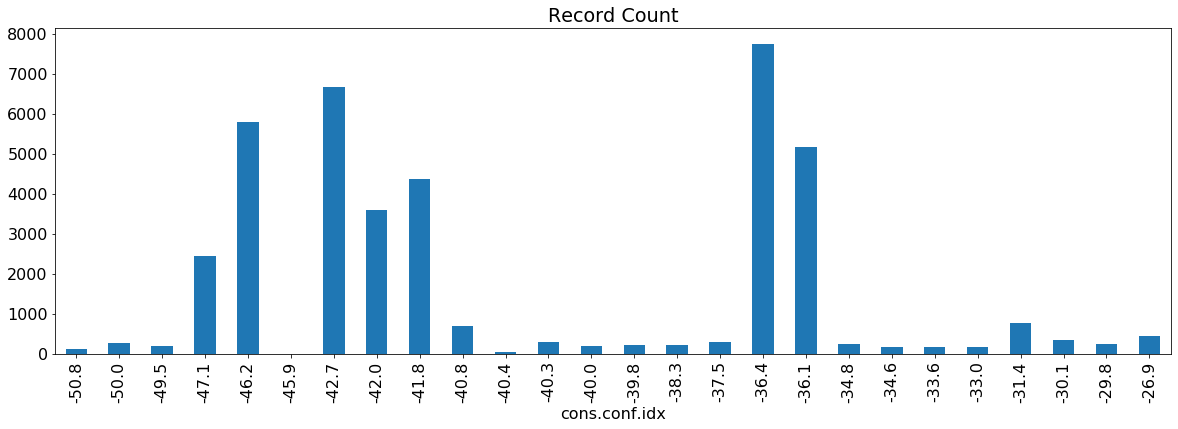

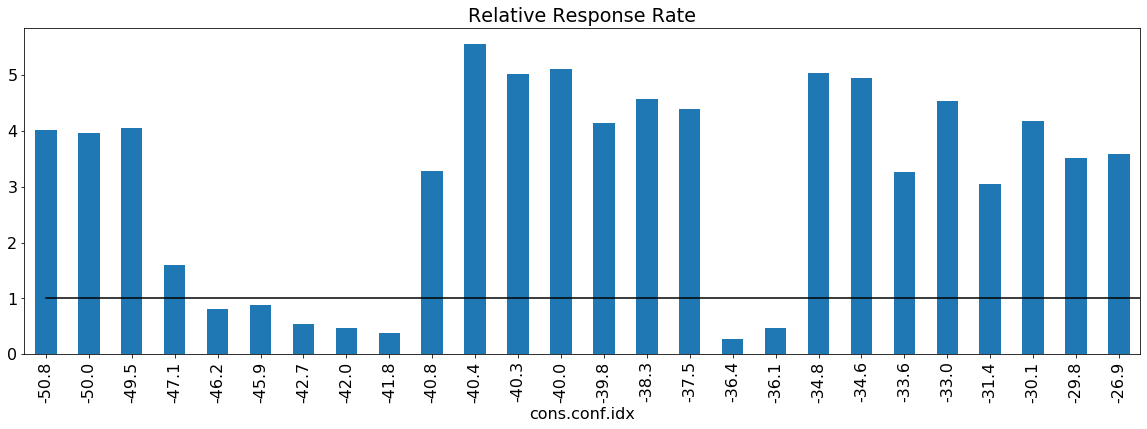

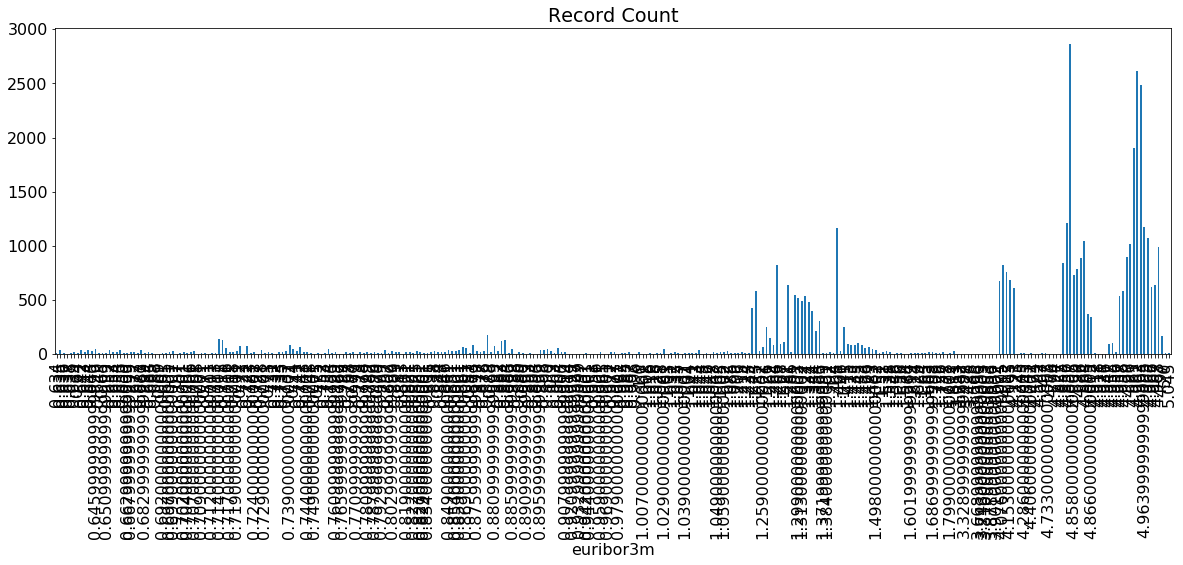

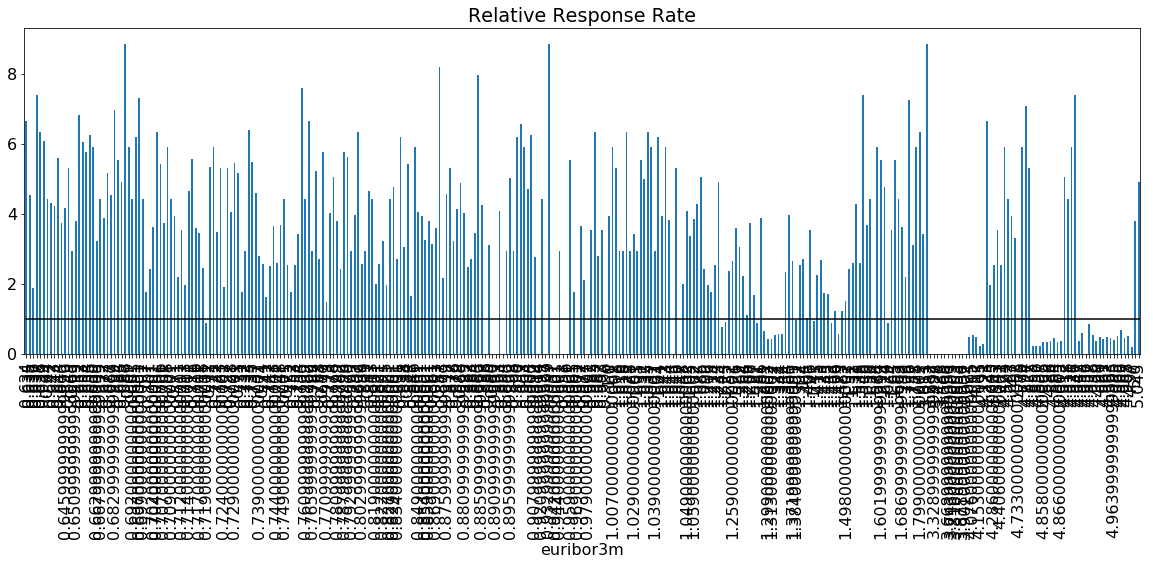

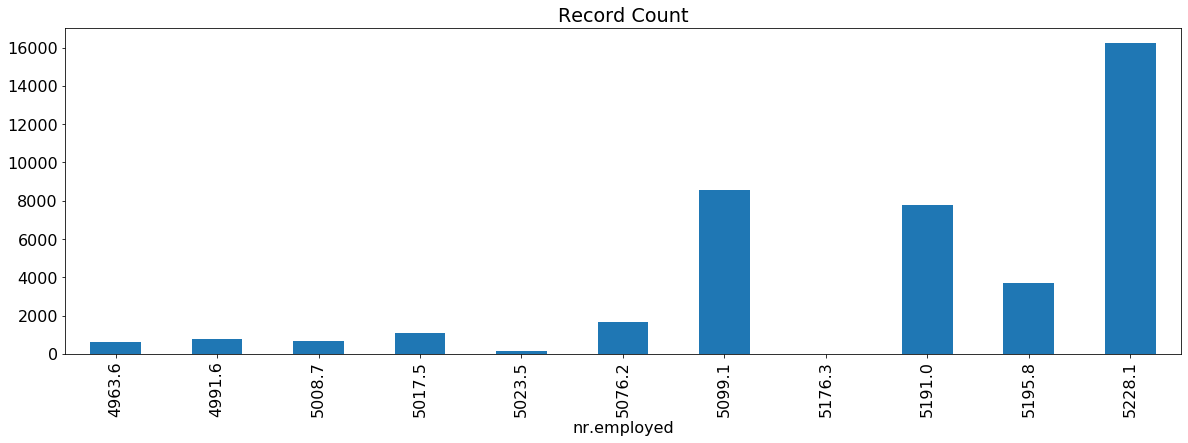

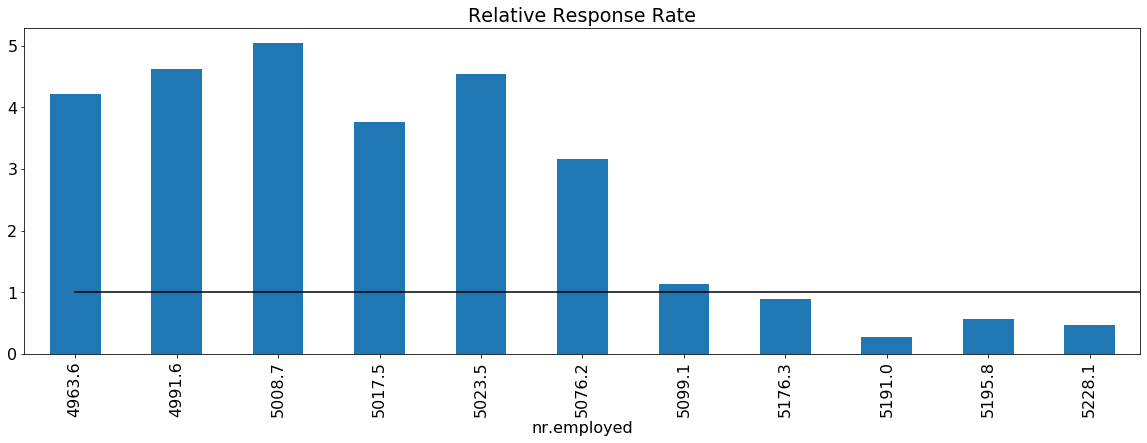

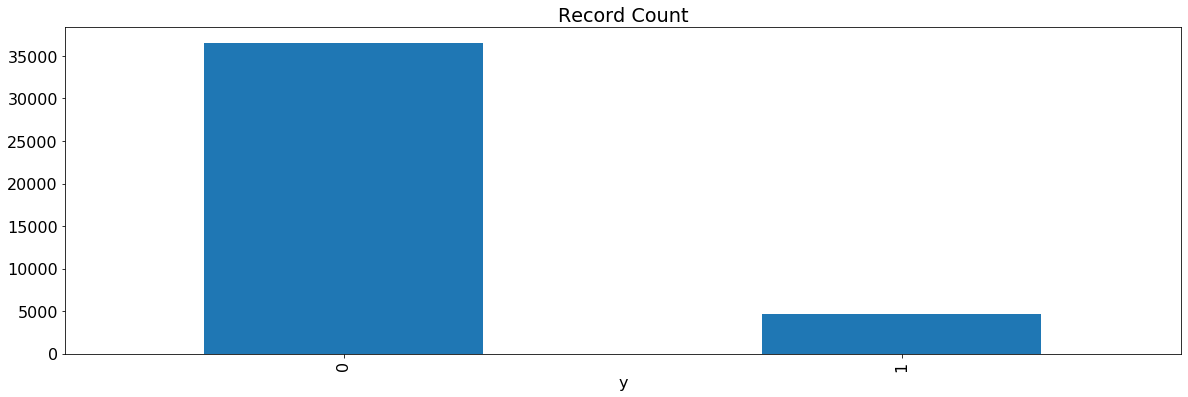

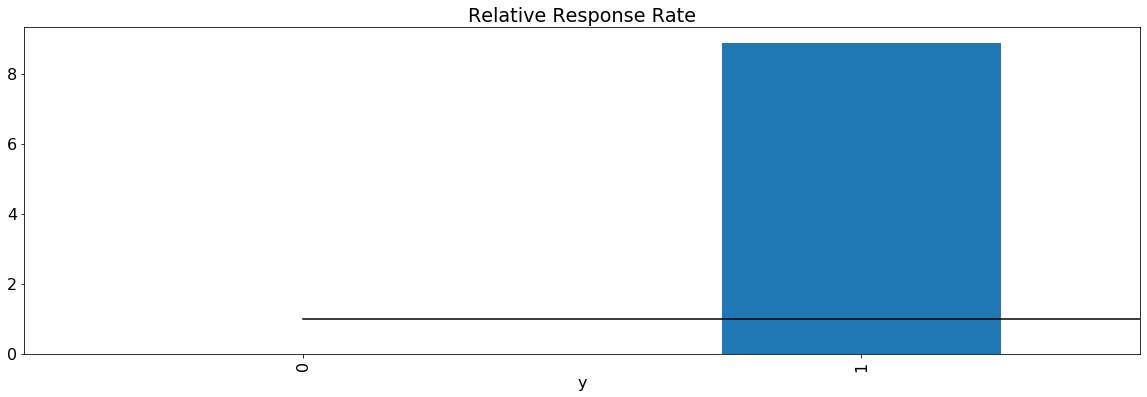

In [21]:
for col in plot_cols:
    plt.title('Record Count')
    plt.xlabel(col)
    data[col].value_counts().sort_index().plot(kind='bar')
    temp = data.groupby(col)['y'].mean(0) / rate
    plt.show()
    plt.xlabel(col)
    plt.title('Relative Response Rate')
    s.plot.line(color='black')
    temp.plot(kind='bar')
    plt.show()

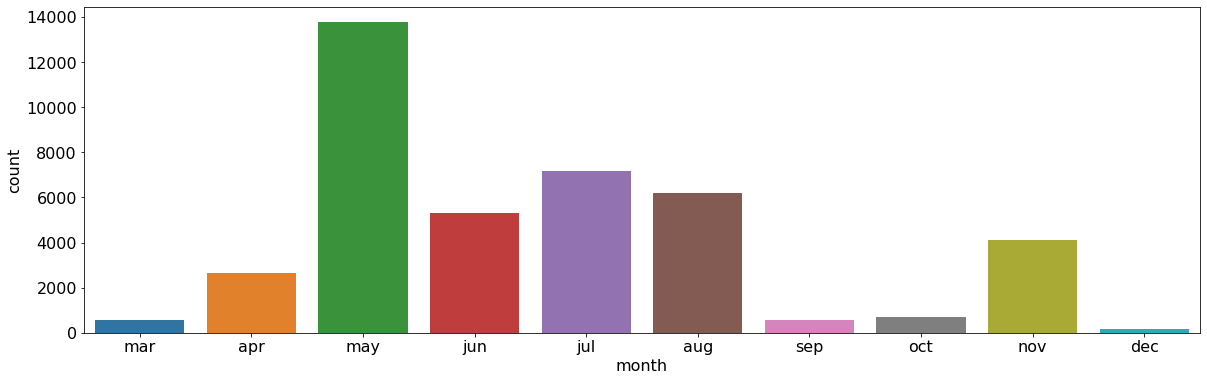

In [22]:
sns.countplot(data['month'], order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

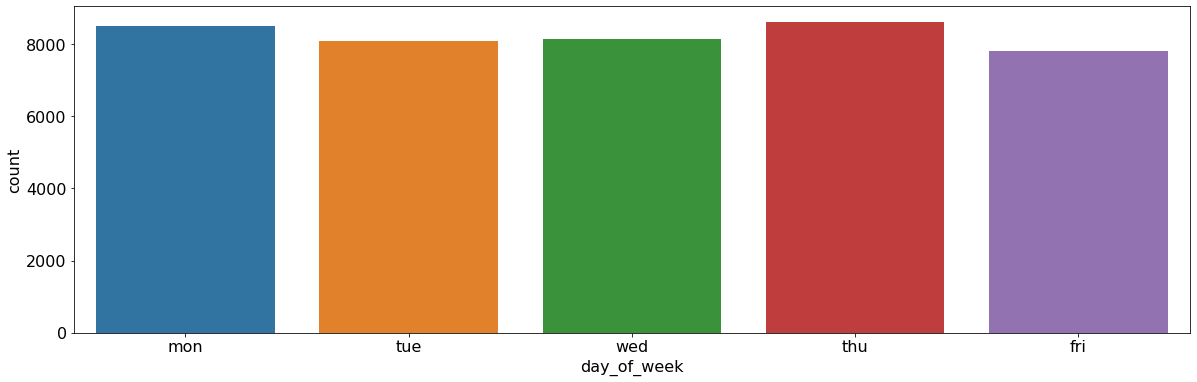

In [23]:
sns.countplot(data['day_of_week'])

(array([1.024e+03, 1.268e+03, 1.887e+03, 2.715e+03, 2.985e+03, 2.912e+03,
        2.846e+03, 2.565e+03, 2.377e+03, 2.064e+03, 1.881e+03, 1.560e+03,
        1.500e+03, 1.212e+03, 1.132e+03, 9.640e+02, 8.530e+02, 8.180e+02,
        7.330e+02, 6.430e+02, 5.620e+02, 4.950e+02, 4.240e+02, 4.200e+02,
        3.740e+02, 3.530e+02, 3.150e+02, 2.790e+02, 2.640e+02, 2.580e+02,
        2.510e+02, 2.160e+02, 1.960e+02, 1.800e+02, 1.630e+02, 1.720e+02,
        1.520e+02, 1.350e+02, 1.320e+02, 1.180e+02, 1.160e+02, 1.110e+02,
        9.100e+01, 7.700e+01, 8.800e+01, 7.300e+01, 7.100e+01, 7.000e+01,
        5.600e+01, 6.100e+01, 4.900e+01, 5.400e+01, 4.400e+01, 5.100e+01,
        5.400e+01, 3.400e+01, 4.600e+01, 4.800e+01, 3.200e+01, 3.200e+01,
        3.500e+01, 3.000e+01, 2.500e+01, 2.600e+01, 1.800e+01, 2.200e+01,
        2.300e+01, 2.400e+01, 2.300e+01, 1.400e+01, 1.200e+01, 1.400e+01,
        1.600e+01, 1.600e+01, 1.400e+01, 1.100e+01, 1.100e+01, 1.000e+01,
        1.200e+01, 1.000e+01, 1.100e+0

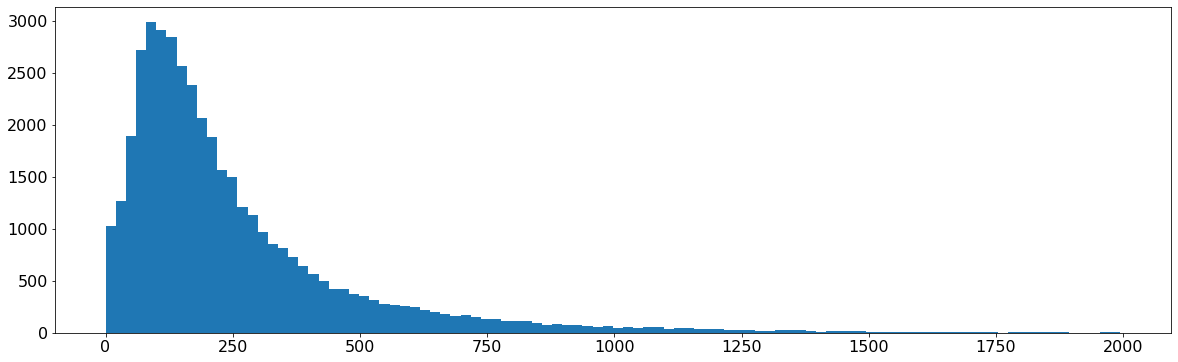

In [24]:
xhigh = 2000
temp = data[data['duration'] <= xhigh]
plt.hist(temp['duration'], bins=100)

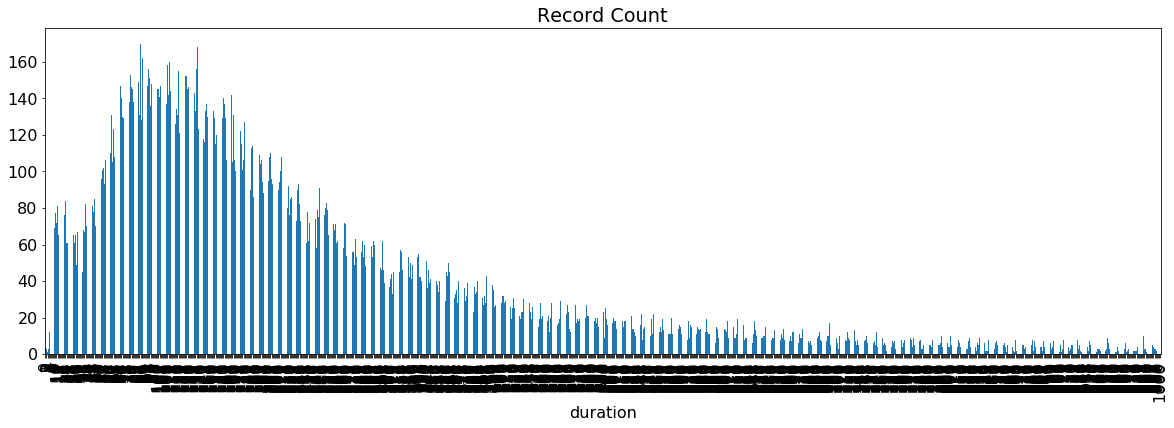

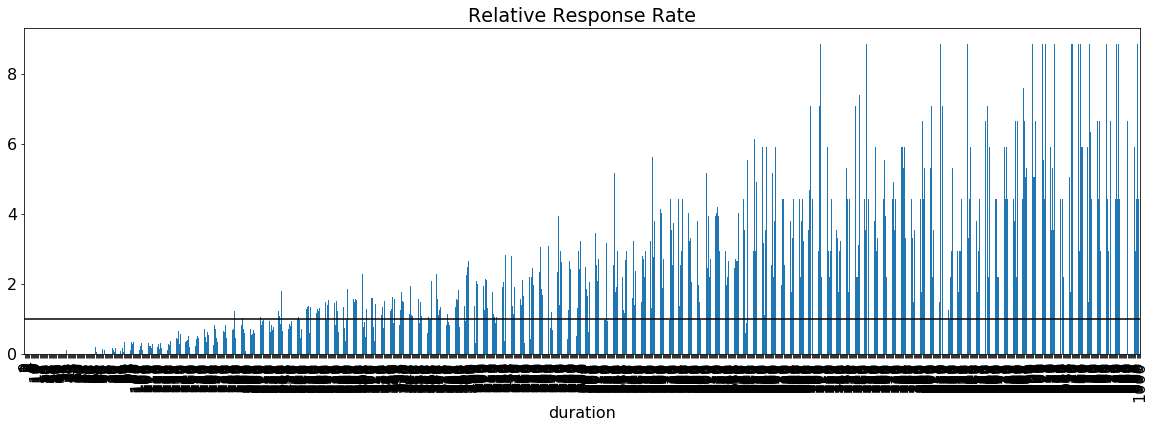

In [25]:
xhigh = 1000
temp = data[data['duration'] <= xhigh]
plt.title('Record Count')
plt.xlabel('duration')
temp['duration'].value_counts().sort_index().plot(kind='bar')
temp2 = temp.groupby('duration')['y'].mean(0) / rate
plt.show()
plt.xlabel('duration')
plt.title('Relative Response Rate')
s.plot.line(color='black')
temp2.plot(kind='bar')
plt.show()

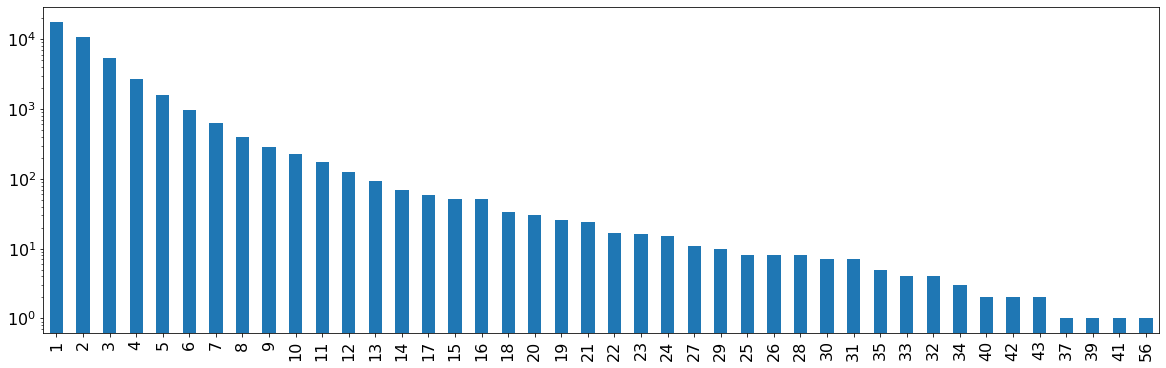

In [26]:
data['campaign'].value_counts().plot(kind='bar')
plt.yscale('log')

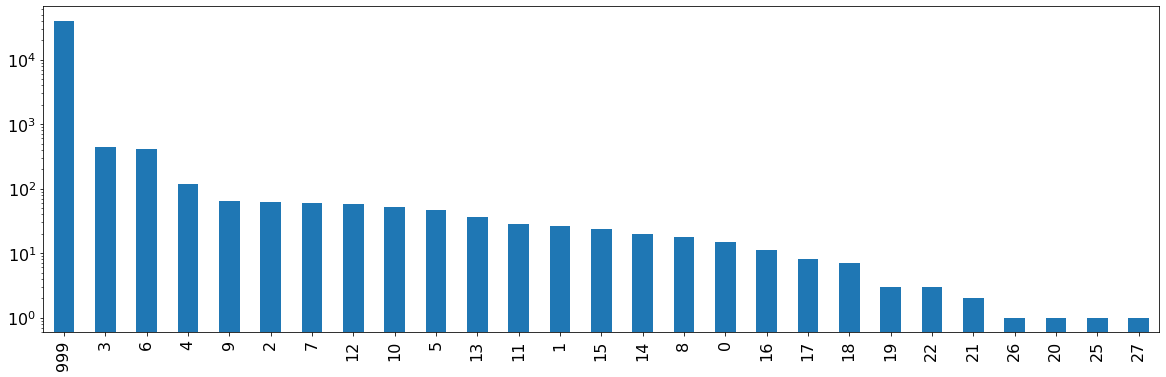

In [27]:
data['pdays'].value_counts().plot(kind='bar')
plt.yscale('log')

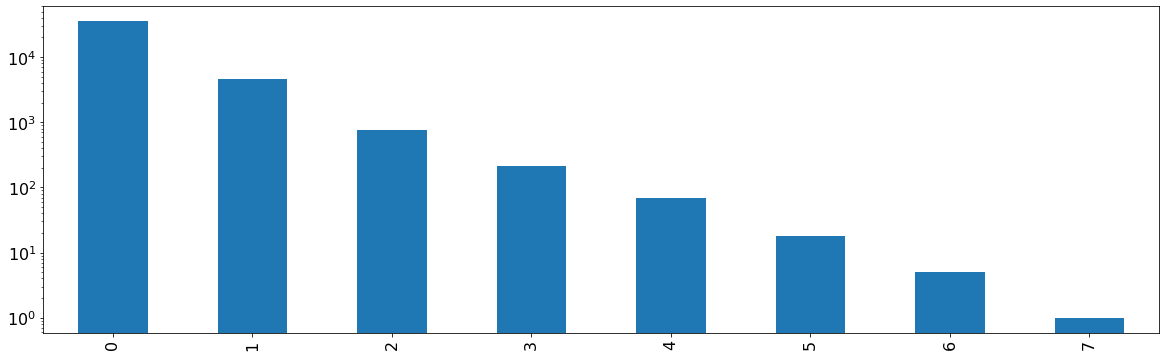

In [28]:
data['previous'].value_counts().plot(kind='bar')
plt.yscale('log')

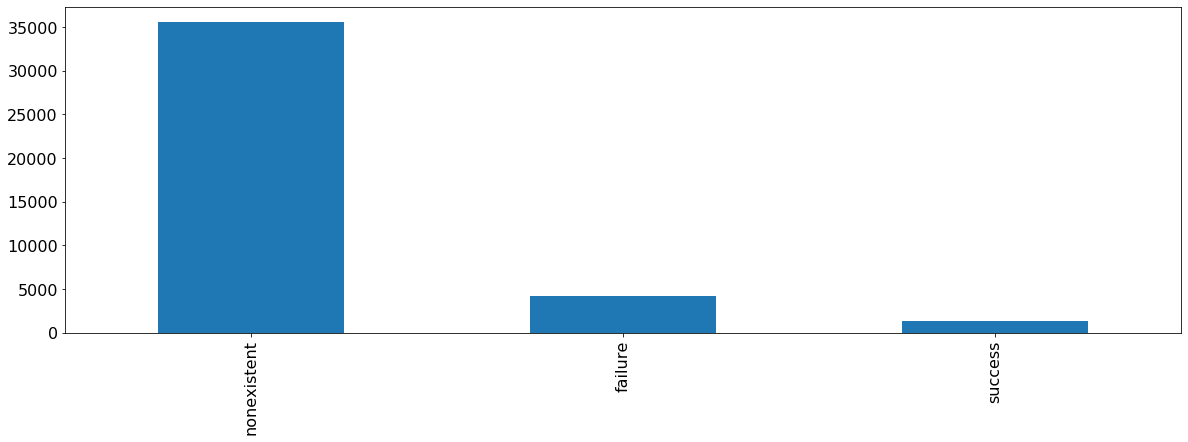

In [29]:
data['poutcome'].value_counts().plot(kind='bar')

(array([ 1242.,  1662.,     0.,  9955.,   635.,     0.,  3692.,     0.,
            0., 23990.]),
 array([-3.4 , -2.92, -2.44, -1.96, -1.48, -1.  , -0.52, -0.04,  0.44,
         0.92,  1.4 ]),
 <a list of 10 Patch objects>)

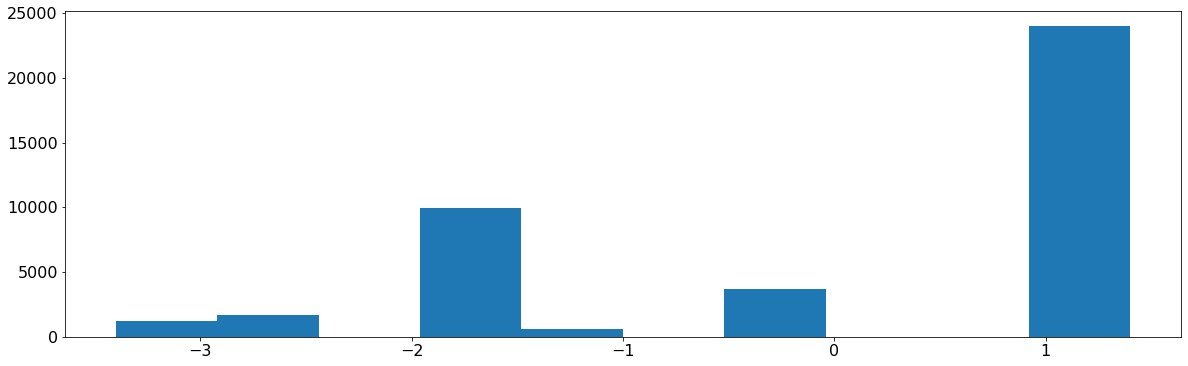

In [30]:
plt.hist(data['emp.var.rate'], bins=10)

(array([  410.,   204.,     0.,     0.,  2457.,  5803.,     0.,     0.,
         6681.,  7989.,   715.,   819.,     0.,   233.,   303., 12935.,
            0.,   438.,   177.,   172.,     0.,   770.,   624.,     0.,
            0.,   446.]),
 array([-50.8       , -49.88076923, -48.96153846, -48.04230769,
        -47.12307692, -46.20384615, -45.28461538, -44.36538462,
        -43.44615385, -42.52692308, -41.60769231, -40.68846154,
        -39.76923077, -38.85      , -37.93076923, -37.01153846,
        -36.09230769, -35.17307692, -34.25384615, -33.33461538,
        -32.41538462, -31.49615385, -30.57692308, -29.65769231,
        -28.73846154, -27.81923077, -26.9       ]),
 <a list of 26 Patch objects>)

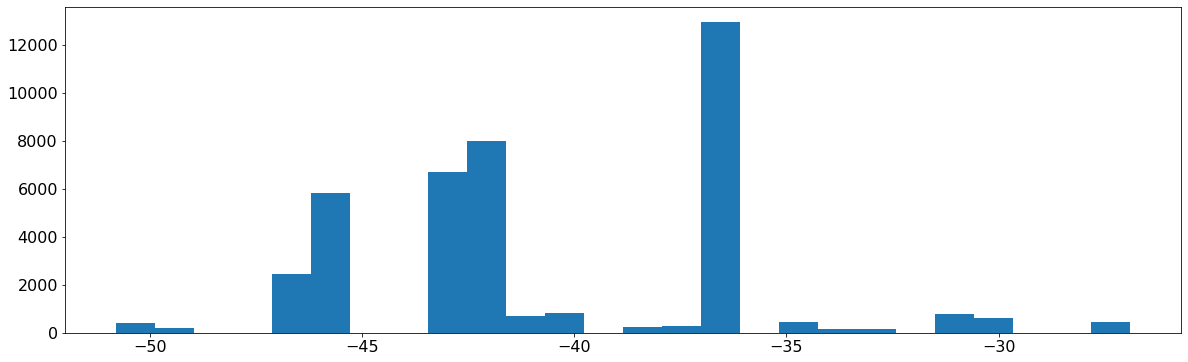

In [31]:
plt.hist(data['cons.conf.idx'], bins=26)

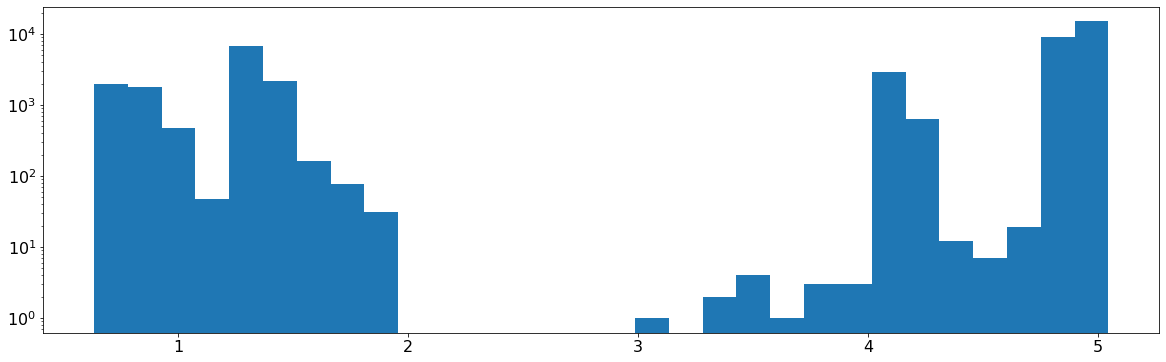

In [32]:
plt.hist(data['euribor3m'], bins=30)
plt.yscale('log')

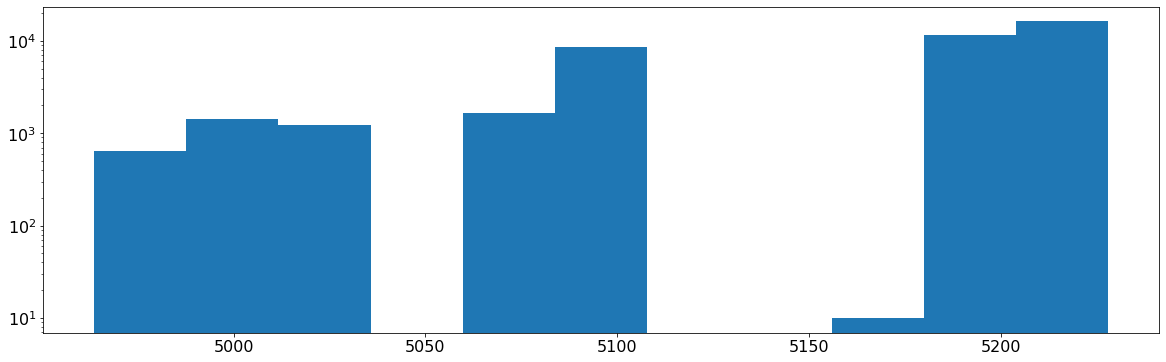

In [33]:
plt.hist(data['nr.employed'], bins=11)
plt.yscale('log')

## Imputation:

Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [34]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [35]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,872,87,384,3317,212,1809,0.0


In [36]:
data['job'][data['age']>60].value_counts()

retired          677
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

** Inferring education from jobs **: From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

** Inferring jobs from education **: If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

** Inferring jobs from age**: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [37]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [38]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,872,87.0,384.0,3327.0,212.0,1809,0.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

In [39]:
jobhousing=cross_tab(data,'job','housing')
jobloan=cross_tab(data,'job','loan')

In [40]:
jobhousing

,no,yes,unknown
job,,,
admin.,4634,5558,227
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,787,908,44
self-employed,641,740,40
services,1817,2049,101
student,381,471,23


** Imputations for house and loan **: We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [41]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no']) /(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [42]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [43]:
data=fillhousing(data,jobhousing)

In [44]:
data=fillloan(data,jobloan)

In [45]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [46]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Model

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size = 0.1942313295, random_state = 101)

# I tried to adjust the split parameters (both ratio between the train and test set & random_state)
# However, it didn't really make much difference

# X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size = 0.25, random_state = 1)
# X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size = 0.3, random_state = 50)

## Make categorical variables using target encoding with smoothing

In [48]:
print(categorical_fields)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [49]:
c = pd.DataFrame(50, index=np.arange(1), columns=categorical_fields)
#c['job'] = 30
#c['marital'] = 30
#c['education'] = 30
#c['default'] = 30
#c['loan'] = 30
#c['contact'] = 30
#c['month'] = 30
#c['day_of_week'] = 30
#c['poutcome'] = 30
#c['housing'] = 30
c.head(20)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,50,50,50,50,50,50,50,50,50,50


In [50]:
nmid = pd.DataFrame(100, index=np.arange(1), columns=categorical_fields)
#nmid['job'] = 10
#nmid['marital'] = 10
#nmid['education'] = 10
#nmid['default'] = 10
#nmid['loan'] = 10
#nmid['contact'] = 10
#nmid['month'] = 10
#nmid['day_of_week'] = 10
#nmid['poutcome'] = 10
#nmid['housing'] = 10
nmid.head(20)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,100,100,100,100,100,100,100,100,100,100


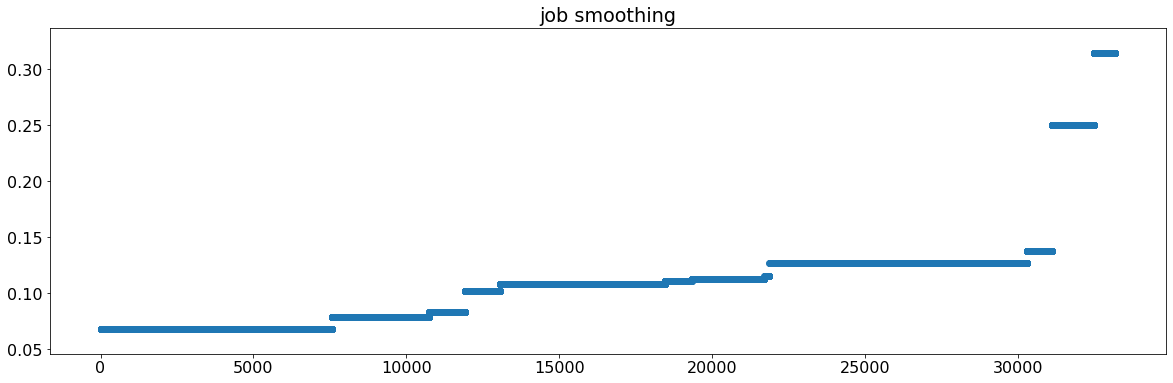

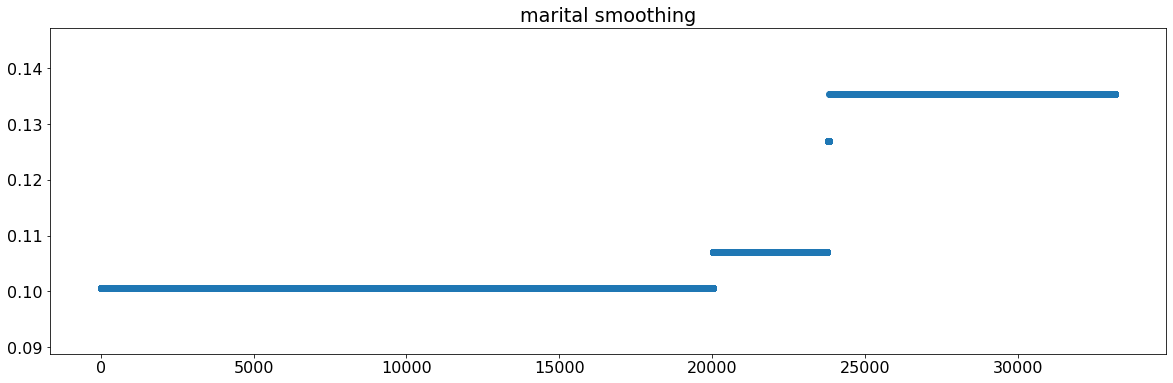

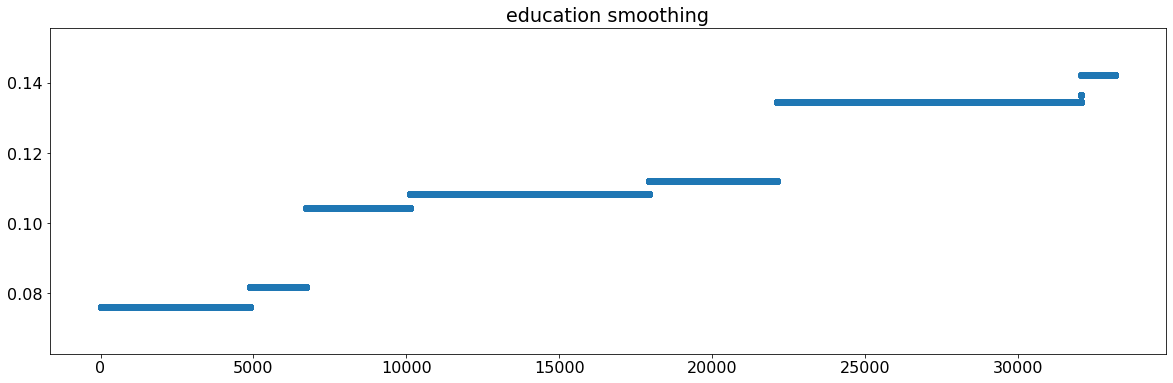

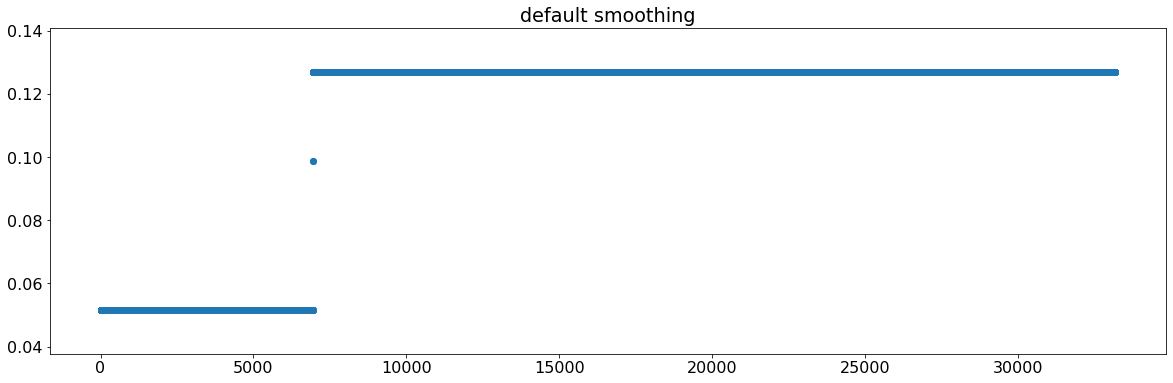

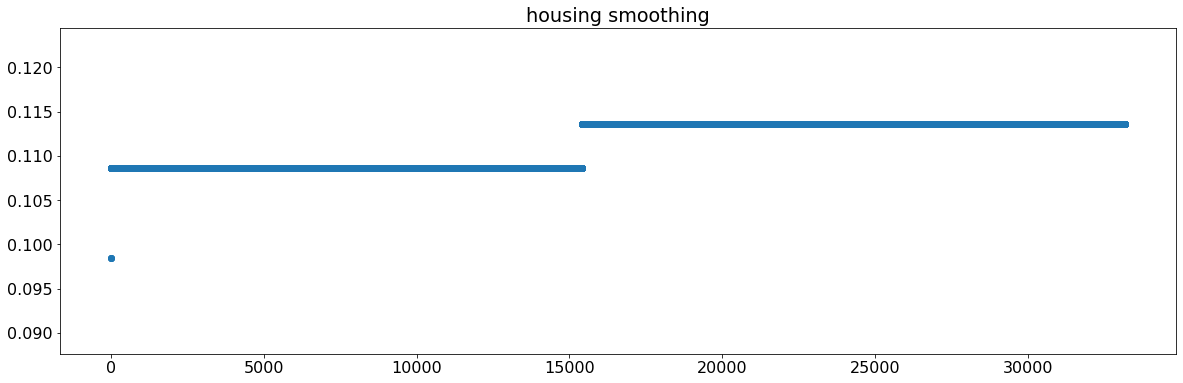

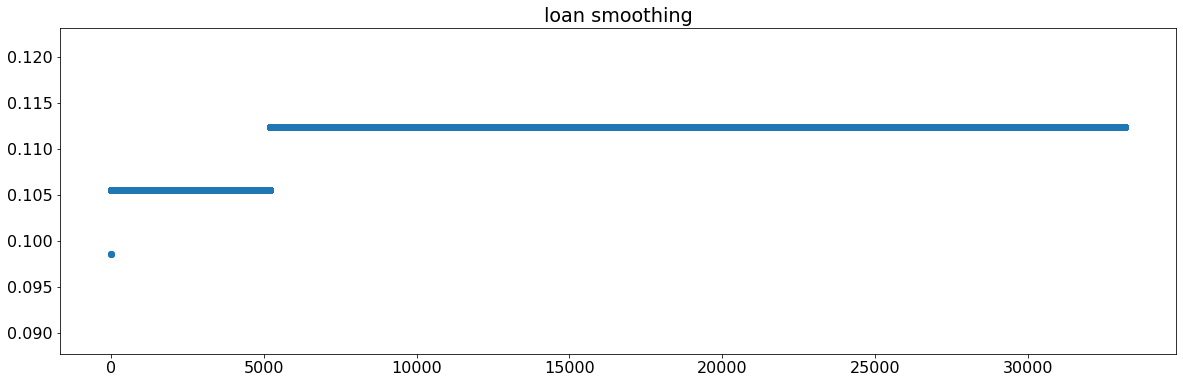

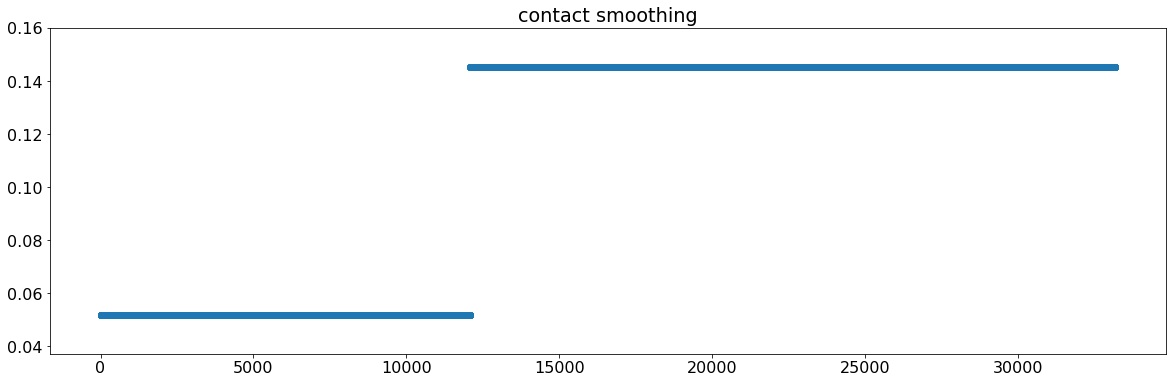

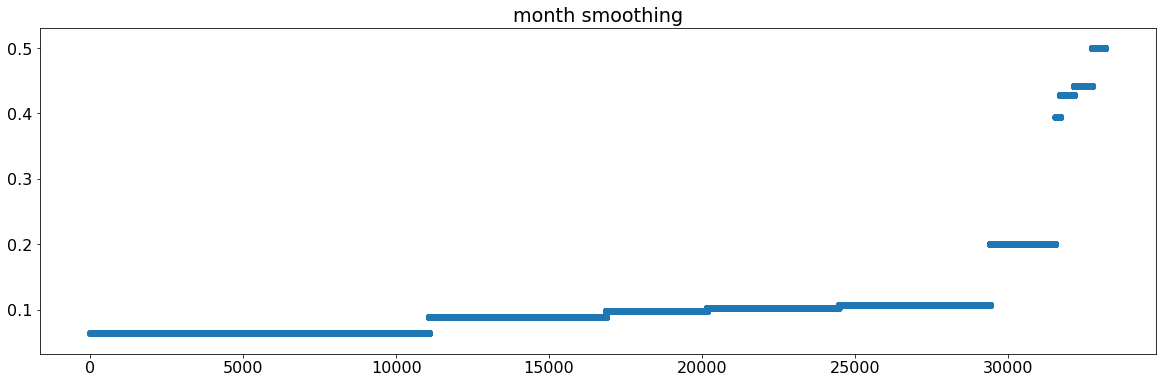

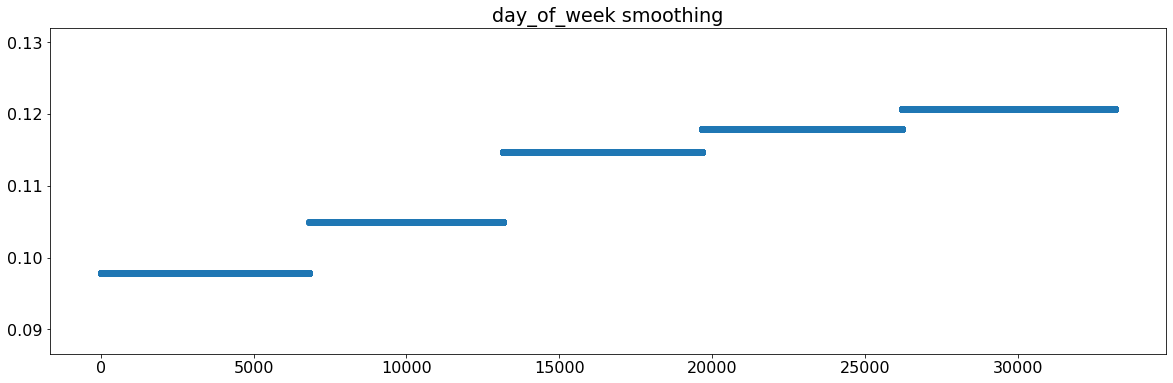

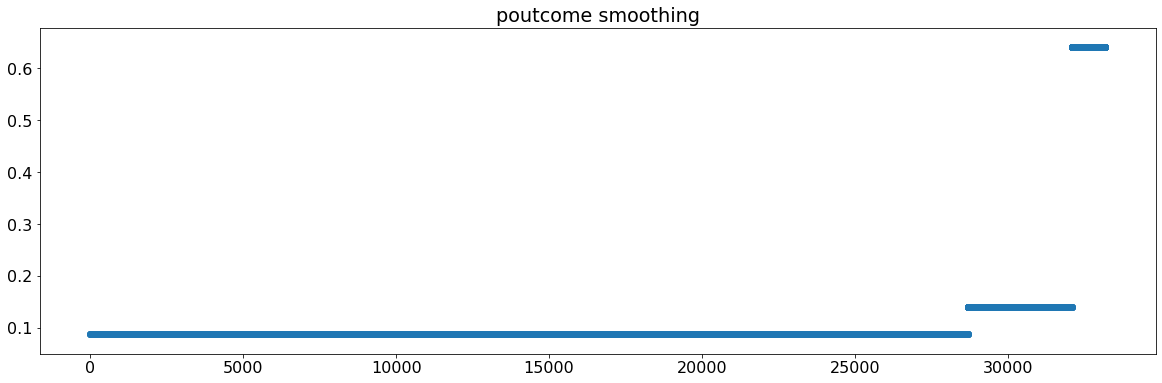

In [51]:
y_avg = data['y'].mean()
for catvar in categorical_fields:
    y_catvar = X_train.groupby(catvar)['y'].mean()
    num_instances_catvar = X_train.groupby(catvar).size()
    y_catvar_smooth = y_avg + (y_catvar - y_avg) / (1 + np.exp(-(num_instances_catvar-nmid.at[0,catvar])/c.at[0,catvar]))
    X_train[catvar+'_tgt'] = X_train[catvar].map(y_catvar_smooth)
    X_test[catvar+'_tgt'] = X_test[catvar].map(y_catvar_smooth)
    data[catvar+'_tgt'] = data[catvar].map(y_catvar_smooth)
    
# Added these visualization line to see the smoothing for the target encoded variables
    plt.scatter(range(X_train.shape[0]), X_train[catvar+'_tgt'].sort_values())
    plt.title(f'{catvar} smoothing')
    plt.show()

In [52]:
X_train.drop(columns=categorical_fields, inplace=True)
X_test.drop(columns=categorical_fields, inplace=True)
data.drop(columns=categorical_fields, inplace=True)
X_train.drop(columns='y', inplace=True)
X_test.drop(columns='y', inplace=True)
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_tgt,marital_tgt,education_tgt,default_tgt,housing_tgt,loan_tgt,contact_tgt,month_tgt,day_of_week_tgt,poutcome_tgt
33739,36,10,9,999,0,-1.8,92.893,-46.2,1.281,5099.1,0.068509,0.100649,0.081843,0.051615,0.113599,0.105557,0.145317,0.064103,0.114646,0.087708
14722,34,1412,4,999,0,1.4,93.918,-42.7,4.961,5228.1,0.068509,0.100649,0.076151,0.127058,0.113599,0.112354,0.145317,0.089147,0.117926,0.087708
571,36,155,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0.108048,0.100649,0.111937,0.127058,0.113599,0.112354,0.051931,0.064103,0.117926,0.087708
3102,32,70,1,999,0,1.1,93.994,-36.4,4.860,5191.0,0.126916,0.100649,0.134687,0.127058,0.113599,0.112354,0.051931,0.064103,0.120751,0.087708
7072,35,52,5,999,0,1.1,93.994,-36.4,4.860,5191.0,0.108048,0.135474,0.134687,0.127058,0.108622,0.112354,0.051931,0.064103,0.120751,0.087708


In [53]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_tgt,marital_tgt,education_tgt,default_tgt,housing_tgt,loan_tgt,contact_tgt,month_tgt,day_of_week_tgt,poutcome_tgt
33739,36,10,9,999,0,-1.8,92.893,-46.2,1.281,5099.1,0.068509,0.100649,0.081843,0.051615,0.113599,0.105557,0.145317,0.064103,0.114646,0.087708
14722,34,1412,4,999,0,1.4,93.918,-42.7,4.961,5228.1,0.068509,0.100649,0.076151,0.127058,0.113599,0.112354,0.145317,0.089147,0.117926,0.087708
571,36,155,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0.108048,0.100649,0.111937,0.127058,0.113599,0.112354,0.051931,0.064103,0.117926,0.087708
3102,32,70,1,999,0,1.1,93.994,-36.4,4.860,5191.0,0.126916,0.100649,0.134687,0.127058,0.113599,0.112354,0.051931,0.064103,0.120751,0.087708
7072,35,52,5,999,0,1.1,93.994,-36.4,4.860,5191.0,0.108048,0.135474,0.134687,0.127058,0.108622,0.112354,0.051931,0.064103,0.120751,0.087708


In [54]:
X_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_tgt,marital_tgt,education_tgt,default_tgt,housing_tgt,loan_tgt,contact_tgt,month_tgt,day_of_week_tgt,poutcome_tgt
count,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000,33178.000000
mean,39.991742,258.359003,2.568871,962.849057,0.172132,0.079107,93.574534,-40.536015,3.618273,5167.037019,0.111275,0.111222,0.111220,0.111285,0.111287,0.111287,0.111279,0.110805,0.111279,0.111279
std,10.398202,260.335578,2.782027,185.980527,0.495936,1.570136,0.578616,4.624139,1.734089,72.138061,0.047889,0.015351,0.020824,0.030678,0.002485,0.002474,0.044946,0.083593,0.008625,0.098911
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.068509,0.100649,0.076151,0.051615,0.098507,0.098507,0.051931,0.064103,0.097861,0.087708
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.078634,0.100649,0.104210,0.127058,0.108622,0.112354,0.051931,0.064103,0.104989,0.087708
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.108048,0.100649,0.108423,0.127058,0.113599,0.112354,0.145317,0.089147,0.114646,0.087708
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.126916,0.135474,0.134687,0.127058,0.113599,0.112354,0.145317,0.106645,0.117926,0.087708
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.314491,0.135474,0.142339,0.127058,0.113599,0.112354,0.145317,0.499514,0.120751,0.640697


In [55]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_tgt', 'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

In [56]:
columns_to_drop = [
#      'age'
     'duration'
#     ,'campaign'
#     ,'pdays'
#     ,'previous'
#     ,'emp.var.rate'
#     ,'cons.price.idx'
#     ,'cons.conf.idx'
#     ,'euribor3m'
#     ,'nr.employed'
#     ,'job_tgt'
#     ,'marital_tgt'
#     ,'education_tgt'
#     ,'default_tgt'
#     ,'housing_tgt'
#     ,'loan_tgt'
#     ,'contact_tgt'
#     ,'month_tgt'
#     ,'day_of_week_tgt'
#     ,'poutcome_tgt'
    ]

In [57]:
X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)

In [58]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_tgt', 'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

In [59]:
# Do univariate tests
nvars = len(data.columns) - 1
Lift = pd.DataFrame(np.zeros((nvars+1,2)))
i = 0
for column in data:
    print(i, column)
    Lift.loc[i, 0] = column
    i= i+1
    
Lift.columns = ['field', 'univariate lift']    
Lift

0 age
1 duration
2 campaign
3 pdays
4 previous
5 emp.var.rate
6 cons.price.idx
7 cons.conf.idx
8 euribor3m
9 nr.employed
10 y
11 job_tgt
12 marital_tgt
13 education_tgt
14 default_tgt
15 housing_tgt
16 loan_tgt
17 contact_tgt
18 month_tgt
19 day_of_week_tgt
20 poutcome_tgt


,field,univariate lift
0,age,0.0
1,duration,0.0
2,campaign,0.0
3,pdays,0.0
4,previous,0.0
5,emp.var.rate,0.0
6,cons.price.idx,0.0
7,cons.conf.idx,0.0
8,euribor3m,0.0
9,nr.employed,0.0


In [60]:
topRows = int(round(len(data)*0.3))
j = 0
third_records = .2 * len(data)
for column in data:
    temp1 = data.sort_values(column,ascending=False).head(topRows)
    temp2 = data.sort_values(column,ascending=True).head(topRows)
    needed1 = temp1.loc[:,'y']
    needed2 = temp2.loc[:,'y']
    lift1 = sum(needed1)/ third_records / rate
    lift2 = sum(needed2)/ third_records / rate
    lift_actual = np.maximum(lift1,lift2)
    print(j, column, lift_actual)
    Lift.loc[j, 'univariate lift'] = lift_actual
    j = j +1

0 age 1.7740892433714162
1 duration 3.522310842854063
2 campaign 1.524035352446648
3 pdays 2.3431774089243373
4 previous 2.192282819573184
5 emp.var.rate 2.9370553998706614
6 cons.price.idx 2.443414528993318
7 cons.conf.idx 1.645828842422936
8 euribor3m 3.270101314938564
9 nr.employed 3.4554860961414096
10 y 5.0
11 job_tgt 2.051088596680319
12 marital_tgt 2.0694115111015305
13 education_tgt 1.8322914421211467
14 default_tgt 2.278508299202414
15 housing_tgt 1.2200905367536106
16 loan_tgt 2.007975856865704
17 contact_tgt 1.7751670618667814
18 month_tgt 2.377667600776029
19 day_of_week_tgt 1.5973270101314938
20 poutcome_tgt 2.1890493640870874


In [61]:
Lift.sort_values(by=['univariate lift'], ascending=False, inplace=True)
Lift

,field,univariate lift
10,y,5.000000
1,duration,3.522311
9,nr.employed,3.455486
8,euribor3m,3.270101
5,emp.var.rate,2.937055
6,cons.price.idx,2.443415
18,month_tgt,2.377668
3,pdays,2.343177
14,default_tgt,2.278508
4,previous,2.192283


In [62]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_tgt', 'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

In [63]:
# Also removed nr.employed as I thought this might have caused overfitting 

columns_to_drop = [
#     'age'
#     ,'duration'
#     ,'campaign'
#     ,'pdays'
#     ,'previous'
#     ,'emp.var.rate'
#     ,'cons.price.idx'
#     ,'cons.conf.idx'
#     ,'euribor3m'
     'nr.employed'
#     ,'job_tgt'
#     ,'marital_tgt'
#     ,'education_tgt'
#     ,'default_tgt'
#     ,'housing_tgt'
#     ,'loan_tgt'
#     ,'contact_tgt'
#     ,'month_tgt'
#     ,'day_of_week_tgt'
#     ,'poutcome_tgt'
    ]

In [64]:
X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)

In [65]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_tgt',
       'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

In [66]:
results_train = y_train.copy()
results_train.columns = ['y_actual']
results_test = y_test.copy()
results_test.columns = ['y_actual']

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)


# I can also increase the number of n_splits, but this did not deliever much improvement either
#k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [67]:
X_train.shape

(33178, 18)

In [68]:
X_test.shape

(7998, 18)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict_proba(X_test)[:,1]

LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
LOGCV_precision = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

In [71]:
results_train['logreg'] = logmodel.predict_proba(X_train)[:,1]
results_test['logreg'] = logpred

k=4 90.11 (+/- 0.21)
k=5 90.17 (+/- 0.20)
k=6 90.32 (+/- 0.14)
k=7 90.36 (+/- 0.22)
k=8 90.40 (+/- 0.17)
k=9 90.35 (+/- 0.16)
k=10 90.41 (+/- 0.18)
k=11 90.41 (+/- 0.23)
k=12 90.46 (+/- 0.22)
k=13 90.51 (+/- 0.19)
k=14 90.51 (+/- 0.21)
k=15 90.49 (+/- 0.23)
k=16 90.52 (+/- 0.20)
k=17 90.61 (+/- 0.24)
k=18 90.58 (+/- 0.25)
k=19 90.60 (+/- 0.23)
k=20 90.64 (+/- 0.26)
k=21 90.63 (+/- 0.26)
k=22 90.62 (+/- 0.25)
k=23 90.67 (+/- 0.24)
k=24 90.64 (+/- 0.26)
k=25 90.63 (+/- 0.26)
k=26 90.61 (+/- 0.22)
k=27 90.70 (+/- 0.22)
k=28 90.71 (+/- 0.16)
k=29 90.70 (+/- 0.23)
k=30 90.67 (+/- 0.19)
The optimal number of neighbors is 27 with 90.7%


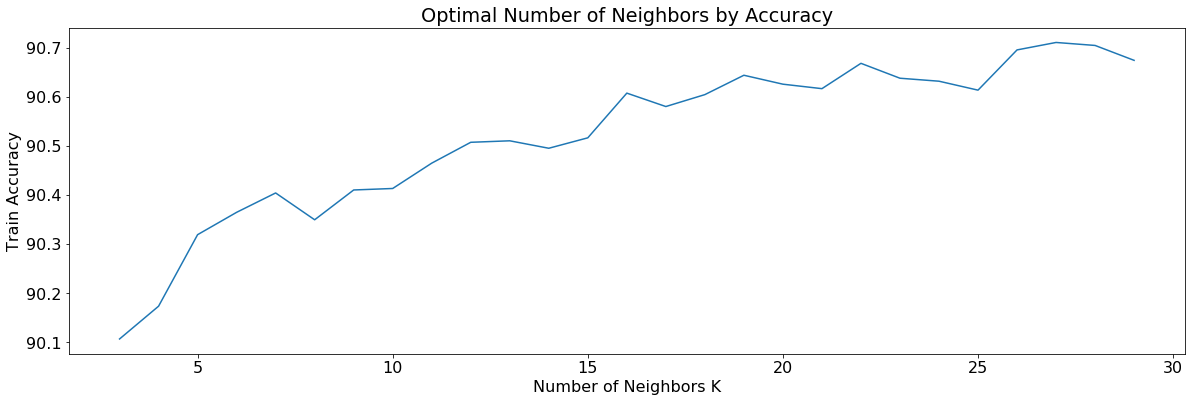

In [72]:
# find a good k for knn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# I added this this line to remove duration in knn 
data_no_duration = data.drop(columns=columns_to_drop)

X_trainK, X_testK, y_trainK, y_testK = train_test_split(data_no_duration, Y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(3,30)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 3-fold cross validation on training set for different values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=3, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k-4]))

plt.plot(neighbors, cv_scores)
plt.title("Optimal Number of Neighbors by Accuracy")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

k=4 61.81 (+/- 1.27)
k=5 58.56 (+/- 0.90)
k=6 63.19 (+/- 0.84)
k=7 60.48 (+/- 1.17)
k=8 63.75 (+/- 0.93)
k=9 60.67 (+/- 0.51)
k=10 63.63 (+/- 0.61)
k=11 61.61 (+/- 0.92)
k=12 64.14 (+/- 1.09)
k=13 62.52 (+/- 0.53)
k=14 64.43 (+/- 0.96)
k=15 62.59 (+/- 0.86)
k=16 64.22 (+/- 1.00)
k=17 63.71 (+/- 1.11)
k=18 64.99 (+/- 1.26)
k=19 63.91 (+/- 1.01)
k=20 65.63 (+/- 1.66)
k=21 64.25 (+/- 1.42)
k=22 65.55 (+/- 1.46)
k=23 64.74 (+/- 1.30)
k=24 65.56 (+/- 1.39)
k=25 64.53 (+/- 1.29)
k=26 65.51 (+/- 1.22)
k=27 65.14 (+/- 1.06)
k=28 66.28 (+/- 0.72)
k=29 65.18 (+/- 1.26)
k=30 65.81 (+/- 0.83)
The optimal number of neighbors is 27 with 65.1%


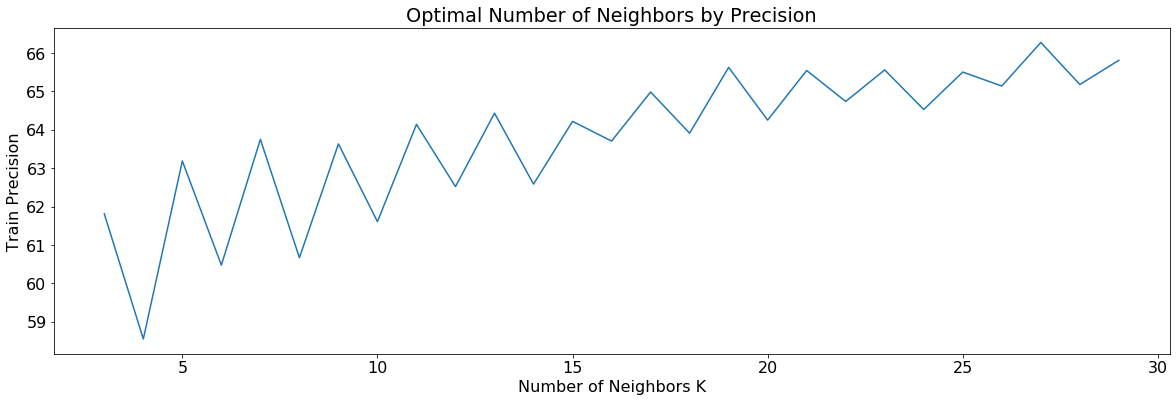

In [73]:
# find a good k for knn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# I added this this line to remove duration in knn 
data_no_duration = data.drop(columns=columns_to_drop)

X_trainK, X_testK, y_trainK, y_testK = train_test_split(data_no_duration, Y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(3,30)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 3-fold cross validation on training set for different values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=3, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='precision')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k-4]))

plt.plot(neighbors, cv_scores)
plt.title("Optimal Number of Neighbors by Precision")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Precision')
plt.show()

In [74]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict_proba(X_test)[:,1]
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
KNNCV_precision = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

In [75]:
results_train['knn'] = knn.predict_proba(X_train)[:,1]
results_test['knn'] = knnpred

In [76]:
from sklearn.svm import SVC
svc= SVC(kernel = 'rbf', probability=True)
svc.fit(X_train, y_train)
svcpred = svc.predict_proba(X_test)[:,1]
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVCCV_precision = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

In [77]:
results_train['svc'] = svc.predict_proba(X_train)[:,1]
results_test['svc'] = svcpred

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# dtree = DecisionTreeClassifier(criterion='gini',max_depth = 20,min_samples_leaf = 150, min_samples_split=400) #criterion = entopy, gini


# possible choices
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [5,10,20], 
              'min_samples_leaf': [50,150], 
              'min_samples_split': [100, 150, 200]}

# Finding the best parameters through Gridsearch
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
print('\tBest criterion:', clf.best_estimator_.get_params()['criterion'],
      '\n\tBest max_depth:', clf.best_estimator_.get_params()['max_depth'],
      '\n\tBest min_samples_leaf:', clf.best_estimator_.get_params()['min_samples_leaf'],
      '\n\tBest min_samples_split:', clf.best_estimator_.get_params()['min_samples_split'])



# Based on the optimal parameter found above, fit decision tree accordingly
dtree = DecisionTreeClassifier(criterion=clf.best_estimator_.get_params()['criterion'],
                               max_depth = clf.best_estimator_.get_params()['max_depth'],
                               min_samples_leaf = clf.best_estimator_.get_params()['min_samples_leaf'], 
                               min_samples_split= clf.best_estimator_.get_params()['min_samples_split'])
dtree.fit(X_train, y_train)
dtreepred = dtree.predict_proba(X_test)[:,1]
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_precision = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

	Best criterion: gini 
	Best max_depth: 10 
	Best min_samples_leaf: 150 
	Best min_samples_split: 100


In [79]:
results_train['dtree'] = dtree.predict_proba(X_train)[:,1]
results_test['dtree'] = dtreepred

In [80]:
from sklearn.ensemble import RandomForestClassifier


# possible choices
parameters = {'criterion': ['entropy','gini'], 
              'n_estimators': [10, 25, 50], 
              'min_samples_split': [10, 25, 50], 
              'min_samples_leaf': [25, 50, 75]}

# Finding the best parameters through Gridsearch
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)
print('\tBest criterion:', clf.best_estimator_.get_params()['criterion'],
      '\n\tBest n_estimators:', clf.best_estimator_.get_params()['n_estimators'],
      '\n\tBest min_samples_split:', clf.best_estimator_.get_params()['min_samples_split'],
      '\n\tBest min_samples_leaf:', clf.best_estimator_.get_params()['min_samples_leaf'])


#rfc = RandomForestClassifier(n_estimators = 100,min_samples_split=200,min_samples_leaf=10,)#criterion = entopy,gini

# Based on the optimal parameter found above, fit random forest accordingly
rfc = RandomForestClassifier(criterion=clf.best_estimator_.get_params()['criterion'],
                               n_estimators = clf.best_estimator_.get_params()['n_estimators'],
                               min_samples_split = clf.best_estimator_.get_params()['min_samples_split'], 
                               min_samples_leaf = clf.best_estimator_.get_params()['min_samples_leaf'])


rfc.fit(X_train, y_train)
rfcpred = rfc.predict_proba(X_test)[:,1]
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
RFCCV_precision = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

	Best criterion: gini 
	Best n_estimators: 25 
	Best min_samples_split: 25 
	Best min_samples_leaf: 25


In [81]:
results_train['rfc'] = rfc.predict_proba(X_train)[:,1]
results_test['rfc'] = rfcpred

In [82]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict_proba(X_test)[:,1]
# probs = gaussiannb.predict_proba(X_test)[:,1]
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GAUSIAN_precision = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

In [83]:
# Before
# results_train['NB'] = dtree.predict_proba(X_train)[:,1]
# results_test['NB'] = dtreepred

# After
results_train['NB'] = gaussiannb.predict_proba(X_train)[:,1]
results_test['NB'] = gaussiannbpred

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict_proba(X_test)[:,1]
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

In [85]:
# Before
# results_train['xgb'] = dtree.predict_proba(X_train)[:,1]
# results_test['xgb'] = dtreepred

# After
results_train['xgb'] = xgb.predict_proba(X_train)[:,1]
results_test['xgb'] = xgbprd

In [86]:
from sklearn.ensemble import GradientBoostingClassifier


# possible choices
parameters = {'n_estimators': [100, 800], 
              'learning_rate': [0.01, 0.05], 
              'max_depth': [3, 6]}

# Finding the best parameters through Gridsearch
gbk = GradientBoostingClassifier()
clf = GridSearchCV(gbk, parameters)
clf.fit(X_train, y_train)
print('\tBest n_estimators:', clf.best_estimator_.get_params()['n_estimators'],
      '\n\tBest learning_rate:', clf.best_estimator_.get_params()['learning_rate'],
      '\n\tBest max_depth:', clf.best_estimator_.get_params()['max_depth'])

#gbk = GradientBoostingClassifier(n_estimators=800, learning_rate=.05, max_depth=3)

# Based on the optimal parameter found above, fit graident boosing accordingly
gbk = GradientBoostingClassifier(n_estimators = clf.best_estimator_.get_params()['n_estimators'],
                                 learning_rate = clf.best_estimator_.get_params()['learning_rate'], 
                                 max_depth = clf.best_estimator_.get_params()['max_depth'])


gbk.fit(X_train, y_train)
gbkpred = gbk.predict_proba(X_test)[:,1]
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GBKCV_precision = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

	Best n_estimators: 100 
	Best learning_rate: 0.05 
	Best max_depth: 6


In [87]:
results_train['GBT'] = gbk.predict_proba(X_train)[:,1]
results_test['GBT'] = gbkpred

In [88]:
results_train.head(20)

,y_actual,logreg,knn,svc,dtree,rfc,NB,xgb,GBT
33739,0,0.060327,0.037037,0.083248,0.016129,0.040348,1.211241e-06,0.002921,0.040303
14722,0,0.050689,0.148148,0.084708,0.075099,0.087098,5.823858e-05,0.050882,0.071190
571,0,0.045140,0.000000,0.084592,0.000000,0.013069,4.620934e-05,0.015994,0.029501
3102,0,0.053412,0.037037,0.084625,0.029279,0.039929,6.744937e-05,0.018243,0.037138
7072,0,0.047710,0.000000,0.084243,0.045720,0.012470,2.344128e-05,0.035705,0.037254
39760,1,0.322899,0.333333,0.226366,0.452586,0.459939,1.621371e-02,0.825982,0.604337
5757,0,0.032361,0.000000,0.084428,0.006309,0.015614,4.061770e-05,0.015503,0.031095
11141,0,0.065389,0.037037,0.084108,0.026549,0.048274,3.674460e-05,0.044507,0.043152
33948,0,0.107844,0.111111,0.084723,0.085106,0.104123,2.170987e-02,0.130936,0.096957
6568,0,0.041245,0.037037,0.084279,0.026490,0.032908,3.005876e-05,0.029915,0.034348


In [89]:
results_test.head(20)

,y_actual,logreg,knn,svc,dtree,rfc,NB,xgb,GBT
26521,0,0.089360,0.111111,0.084468,0.107383,0.093527,0.000925,0.087351,0.057773
33163,0,0.124300,0.037037,0.084518,0.085106,0.079826,0.024686,0.105268,0.080469
18770,0,0.065156,0.111111,0.084316,0.021739,0.084382,0.000110,0.098426,0.069891
180,0,0.039008,0.000000,0.084618,0.006309,0.011699,0.000032,0.011329,0.029438
10764,0,0.051943,0.074074,0.084658,0.045720,0.030756,0.000021,0.051564,0.042048
34348,0,0.135499,0.074074,0.085582,0.070423,0.091624,0.032295,0.057543,0.123225
14284,0,0.052940,0.037037,0.084715,0.048454,0.033164,0.000143,0.062777,0.061195
13533,0,0.048769,0.148148,0.084704,0.075099,0.080937,0.000005,0.093806,0.062058
40023,1,0.405448,0.407407,0.433869,0.452586,0.556517,0.010629,0.528427,0.554343
34692,0,0.111512,0.000000,0.083144,0.070423,0.092828,0.001876,0.077440,0.087484


In [90]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, KNNCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.900778
1,Decision Tree Classifier,0.900175
7,Gradient Boosting,0.899421
6,XGBoost,0.899271
4,Logistic Model,0.898849
2,Support Vector Machine,0.896980
3,K-Near Neighbors,0.896980
5,Gausian NB,0.872476


In [91]:
# Just wanted to see if there's any difference when comparing against the AUC later
# Couldn't figuire out how to get the precision score for XGB

precision = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV_precision, DTREECV_precision, KNNCV_precision, KNNCV_precision, LOGCV_precision, GAUSIAN_precision, GBKCV_precision]})

precision

,Models,Score
0,Random Forest Classifier,0.678077
1,Decision Tree Classifier,0.655948
2,Support Vector Machine,0.593429
3,K-Near Neighbors,0.593429
4,Logistic Model,0.624932
5,Gausian NB,0.428737
6,Gradient Boosting,0.611295


**Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**

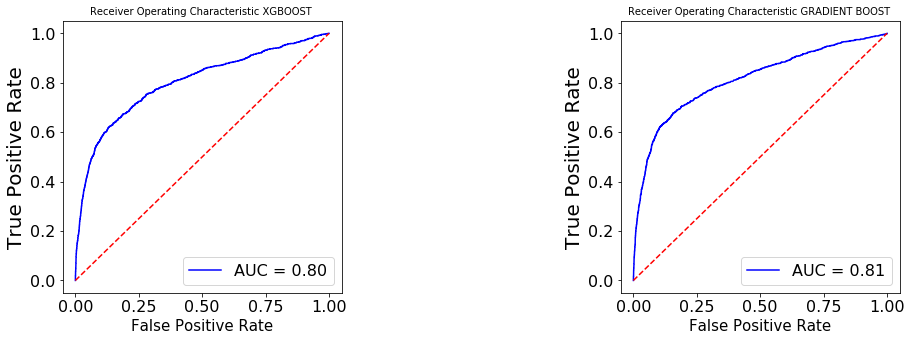

In [92]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


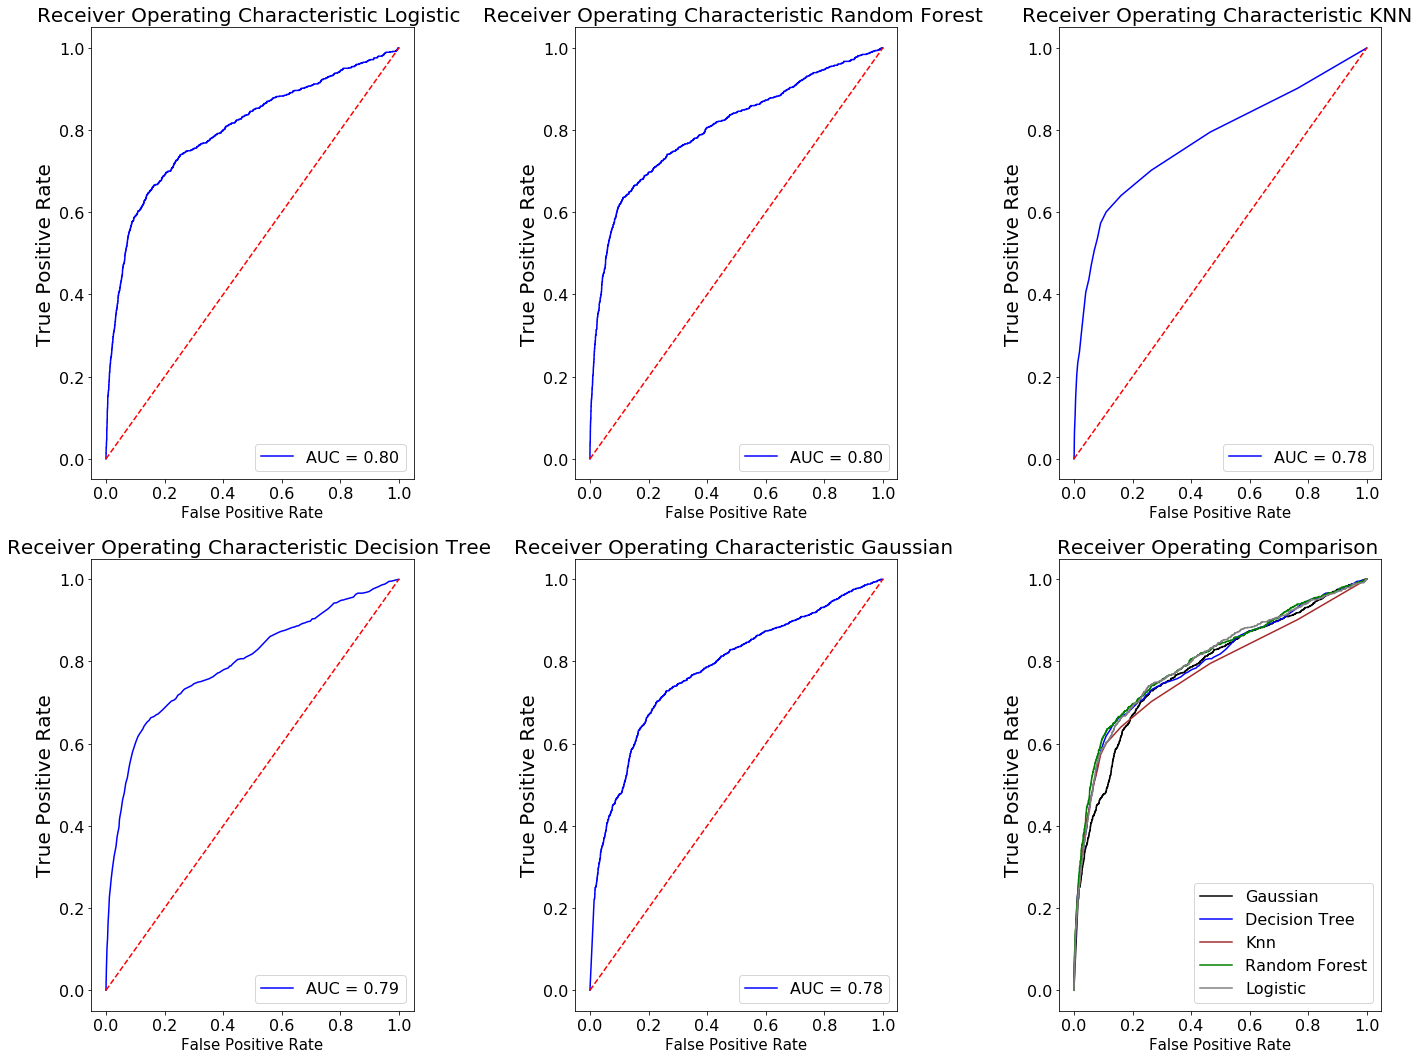

In [93]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [94]:
y_train

,label
33739,0
14722,0
571,0
3102,0
7072,0
...,...
12365,0
5696,0
8007,0
17749,1


In [95]:
tot_train = len(y_train)
tot_goods_train = y_train['label'].sum()
tot_bads_train = tot_train - tot_goods_train
tot_test = len(y_test)
tot_goods_test = y_test['label'].sum()
tot_bads_test = tot_test - tot_goods_test
response_rate_train = tot_goods_train / tot_train
response_rate_test = tot_goods_test / tot_test
print(response_rate_train)
print(response_rate_test)

0.11127855808065586
0.11840460115028757


In [96]:
cost_per_contact = 3
revenue_per_good = 40.

In [97]:
lift_bin = 20
cols_eval = ['logreg', 'knn', 'svc', 'dtree', 'rfc', 'NB', 'xgb', 'GBT']
for col_eval in cols_eval:
    cols = ['bin','tot recs','bin recs','#g','#b','%g','%b','cg','cb','%cg','%cb','KS','bin resp rate','cum resp rate','bin lift','cum lift','cost','revenue','profit']
    lift_trn = pd.DataFrame(np.zeros((101, 19)), columns = cols)
    lift_tst = pd.DataFrame(np.zeros((101, 19)), columns = cols)
    trn_sorted = results_train.sort_values(col_eval,ascending=False)
    tst_sorted = results_test.sort_values(col_eval,ascending=False)

    for i in range(101):
        percent_rows_trn = int(round(results_train.shape[0]*0.01*i))
        percent_rows_tst = int(round(results_test.shape[0]*0.01*i))
        temp_trn = trn_sorted.head(percent_rows_trn)
        temp_tst = tst_sorted.head(percent_rows_tst)
        num_good_trn = sum(temp_trn.loc[:,'y_actual'])
        num_good_tst = sum(temp_tst.loc[:,'y_actual'])
        num_tot_trn = len(temp_trn)
        num_tot_tst = len(temp_tst)
        num_bad_trn = num_tot_trn - num_good_trn
        num_bad_tst = num_tot_tst - num_good_tst

        lift_trn.loc[i, 'bin'] = i
        lift_trn.loc[i,'bin recs'] = 0
        lift_trn.loc[i, 'tot recs'] = num_tot_trn
        lift_trn.loc[i, 'cg'] = num_good_trn
        lift_trn.loc[i, 'cb'] = num_bad_trn
        lift_tst.loc[i, 'bin'] = i
        lift_tst.loc[i,'bin recs'] = 0
        lift_tst.loc[i, 'tot recs'] = num_tot_tst
        lift_tst.loc[i, 'cg'] = num_good_tst
        lift_tst.loc[i, 'cb'] = num_bad_tst

        if i != 0:
            lift_trn.loc[i, '#g'] = num_good_trn - lift_trn.loc[i-1, 'cg']
            lift_trn.loc[i, '#b'] = num_bad_trn - lift_trn.loc[i-1, 'cb']
            lift_trn.loc[i,'bin recs'] = lift_trn.loc[i, '#g'] + lift_trn.loc[i, '#b']
            lift_trn.loc[i, '%g'] = 100 * lift_trn.loc[i, '#g'] / tot_goods_train
            lift_trn.loc[i, '%b'] = 100 - lift_trn.loc[i, '%g']
            lift_trn.loc[i, '%cg'] = 100 * num_good_trn / tot_goods_train
            lift_trn.loc[i, '%cb'] = 100 * num_bad_trn / tot_bads_train
            lift_trn.loc[i, 'KS'] = -(lift_trn.loc[i, '%cb'] - lift_trn.loc[i, '%cg'])
            lift_trn.loc[i, 'bin resp rate'] = lift_trn.loc[i, '#g'] / lift_trn.loc[i, 'bin recs']
            lift_trn.loc[i, 'cum resp rate'] = lift_trn.loc[i, 'cg'] / lift_trn.loc[i, 'tot recs']
            lift_trn.loc[i, 'bin lift'] = lift_trn.loc[i, 'bin resp rate'] / response_rate_train
            lift_trn.loc[i, 'cum lift'] = lift_trn.loc[i, 'cum resp rate'] / response_rate_train
            lift_trn.loc[i, 'cost'] = lift_trn.loc[i, 'tot recs'] * cost_per_contact
            lift_trn.loc[i, 'revenue'] = lift_trn.loc[i, 'cg'] * revenue_per_good
            lift_trn.loc[i, 'profit'] = lift_trn.loc[i, 'revenue'] - lift_trn.loc[i, 'cost']

            lift_tst.loc[i, '#g'] = num_good_tst - lift_tst.loc[i-1, 'cg']
            lift_tst.loc[i, '#b'] = num_bad_tst - lift_tst.loc[i-1, 'cb']
            lift_tst.loc[i,'bin recs'] = lift_tst.loc[i, '#g'] + lift_tst.loc[i, '#b']
            lift_tst.loc[i, '%g'] = 100 * lift_tst.loc[i, '#g'] / tot_goods_test
            lift_tst.loc[i, '%b'] = 100 - lift_tst.loc[i, '%g']
            lift_tst.loc[i, '%cg'] = 100 * num_good_tst / tot_goods_test
            lift_tst.loc[i, '%cb'] = 100 * num_bad_tst / tot_bads_test
            lift_tst.loc[i, 'KS'] = -(lift_tst.loc[i, '%cb'] - lift_tst.loc[i, '%cg'])
            lift_tst.loc[i, 'bin resp rate'] = lift_tst.loc[i, '#g'] / lift_tst.loc[i, 'bin recs']
            lift_tst.loc[i, 'cum resp rate'] = lift_tst.loc[i, 'cg'] / lift_tst.loc[i, 'tot recs']
            lift_tst.loc[i, 'bin lift'] = lift_tst.loc[i, 'bin resp rate'] / response_rate_test        
            lift_tst.loc[i, 'cum lift'] = lift_tst.loc[i, 'cum resp rate'] / response_rate_test
            lift_tst.loc[i, 'cost'] = lift_tst.loc[i, 'tot recs'] * cost_per_contact
            lift_tst.loc[i, 'revenue'] = lift_tst.loc[i, 'cg'] * revenue_per_good
            lift_tst.loc[i, 'profit'] = lift_tst.loc[i, 'revenue'] - lift_tst.loc[i, 'cost']


    first_bin_lift = lift_tst.loc[1,'cum lift']
    lift_profit_tst_max = lift_tst['profit'].max()
    print('Model is', col_eval, '   Max profit is',lift_profit_tst_max, '   Lift in the ',lift_bin,'th bin is', lift_tst.loc[lift_bin,'cum lift'])

Model is logreg    Max profit is 20483.0    Lift in the  20 th bin is 3.214613252375924
Model is knn    Max profit is 19163.0    Lift in the  20 th bin is 3.1459926082365364
Model is svc    Max profit is 15920.0    Lift in the  20 th bin is 2.7078761879619853
Model is dtree    Max profit is 20003.0    Lift in the  20 th bin is 3.2568413410770853
Model is rfc    Max profit is 20363.0    Lift in the  20 th bin is 3.2515628299894406
Model is NB    Max profit is 19923.0    Lift in the  20 th bin is 2.950687697993664
Model is xgb    Max profit is 20403.0    Lift in the  20 th bin is 3.1354355860612464
Model is GBT    Max profit is 20723.0    Lift in the  20 th bin is 3.2621198521647305


In [98]:
# do it again for your favorite model
cols_eval = ['GBT']
for col_eval in cols_eval:
    cols = ['bin','tot recs','bin recs','#g','#b','%g','%b','cg','cb','%cg','%cb','KS','bin resp rate','cum resp rate','bin lift','cum lift','cost','revenue','profit']
    lift_trn = pd.DataFrame(np.zeros((101, 19)), columns = cols)
    lift_tst = pd.DataFrame(np.zeros((101, 19)), columns = cols)
    trn_sorted = results_train.sort_values(col_eval,ascending=False)
    tst_sorted = results_test.sort_values(col_eval,ascending=False)

    for i in range(101):
        percent_rows_trn = int(round(results_train.shape[0]*0.01*i))
        percent_rows_tst = int(round(results_test.shape[0]*0.01*i))
        temp_trn = trn_sorted.head(percent_rows_trn)
        temp_tst = tst_sorted.head(percent_rows_tst)
        num_good_trn = sum(temp_trn.loc[:,'y_actual'])
        num_good_tst = sum(temp_tst.loc[:,'y_actual'])
        num_tot_trn = len(temp_trn)
        num_tot_tst = len(temp_tst)
        num_bad_trn = num_tot_trn - num_good_trn
        num_bad_tst = num_tot_tst - num_good_tst

        lift_trn.loc[i, 'bin'] = i
        lift_trn.loc[i,'bin recs'] = 0
        lift_trn.loc[i, 'tot recs'] = num_tot_trn
        lift_trn.loc[i, 'cg'] = num_good_trn
        lift_trn.loc[i, 'cb'] = num_bad_trn
        lift_tst.loc[i, 'bin'] = i
        lift_tst.loc[i,'bin recs'] = 0
        lift_tst.loc[i, 'tot recs'] = num_tot_tst
        lift_tst.loc[i, 'cg'] = num_good_tst
        lift_tst.loc[i, 'cb'] = num_bad_tst

        if i != 0:
            lift_trn.loc[i, '#g'] = num_good_trn - lift_trn.loc[i-1, 'cg']
            lift_trn.loc[i, '#b'] = num_bad_trn - lift_trn.loc[i-1, 'cb']
            lift_trn.loc[i,'bin recs'] = lift_trn.loc[i, '#g'] + lift_trn.loc[i, '#b']
            lift_trn.loc[i, '%g'] = 100 * lift_trn.loc[i, '#g'] / tot_goods_train
            lift_trn.loc[i, '%b'] = 100 - lift_trn.loc[i, '%g']
            lift_trn.loc[i, '%cg'] = 100 * num_good_trn / tot_goods_train
            lift_trn.loc[i, '%cb'] = 100 * num_bad_trn / tot_bads_train
            lift_trn.loc[i, 'KS'] = -(lift_trn.loc[i, '%cb'] - lift_trn.loc[i, '%cg'])
            lift_trn.loc[i, 'bin resp rate'] = lift_trn.loc[i, '#g'] / lift_trn.loc[i, 'bin recs']
            lift_trn.loc[i, 'cum resp rate'] = lift_trn.loc[i, 'cg'] / lift_trn.loc[i, 'tot recs']
            lift_trn.loc[i, 'bin lift'] = lift_trn.loc[i, 'bin resp rate'] / response_rate_train
            lift_trn.loc[i, 'cum lift'] = lift_trn.loc[i, 'cum resp rate'] / response_rate_train
            lift_trn.loc[i, 'cost'] = lift_trn.loc[i, 'tot recs'] * cost_per_contact
            lift_trn.loc[i, 'revenue'] = lift_trn.loc[i, 'cg'] * revenue_per_good
            lift_trn.loc[i, 'profit'] = lift_trn.loc[i, 'revenue'] - lift_trn.loc[i, 'cost']

            lift_tst.loc[i, '#g'] = num_good_tst - lift_tst.loc[i-1, 'cg']
            lift_tst.loc[i, '#b'] = num_bad_tst - lift_tst.loc[i-1, 'cb']
            lift_tst.loc[i,'bin recs'] = lift_tst.loc[i, '#g'] + lift_tst.loc[i, '#b']
            lift_tst.loc[i, '%g'] = 100 * lift_tst.loc[i, '#g'] / tot_goods_test
            lift_tst.loc[i, '%b'] = 100 - lift_tst.loc[i, '%g']
            lift_tst.loc[i, '%cg'] = 100 * num_good_tst / tot_goods_test
            lift_tst.loc[i, '%cb'] = 100 * num_bad_tst / tot_bads_test
            lift_tst.loc[i, 'KS'] = -(lift_tst.loc[i, '%cb'] - lift_tst.loc[i, '%cg'])
            lift_tst.loc[i, 'bin resp rate'] = lift_tst.loc[i, '#g'] / lift_tst.loc[i, 'bin recs']
            lift_tst.loc[i, 'cum resp rate'] = lift_tst.loc[i, 'cg'] / lift_tst.loc[i, 'tot recs']
            lift_tst.loc[i, 'bin lift'] = lift_tst.loc[i, 'bin resp rate'] / response_rate_test        
            lift_tst.loc[i, 'cum lift'] = lift_tst.loc[i, 'cum resp rate'] / response_rate_test
            lift_tst.loc[i, 'cost'] = lift_tst.loc[i, 'tot recs'] * cost_per_contact
            lift_tst.loc[i, 'revenue'] = lift_tst.loc[i, 'cg'] * revenue_per_good
            lift_tst.loc[i, 'profit'] = lift_tst.loc[i, 'revenue'] - lift_tst.loc[i, 'cost']


    first_bin_lift = lift_tst.loc[1,'cum lift']
    lift_profit_tst_max = lift_tst['profit'].max()
    print('Model is', col_eval, '   Max profit is',lift_profit_tst_max, '   Lift in the ',lift_bin,'th bin is', lift_tst.loc[lift_bin,'cum lift'])

# results_train.to_csv('results_train.csv')
# results_test.to_csv('results_test.csv')
lift_trn.to_csv('lift_trn.csv',index=False)
lift_tst.to_csv('lift_tst.csv',index=False)

Model is GBT    Max profit is 20723.0    Lift in the  20 th bin is 3.2621198521647305


Text(0.5, 0, 'Campaign Penetration Depth')

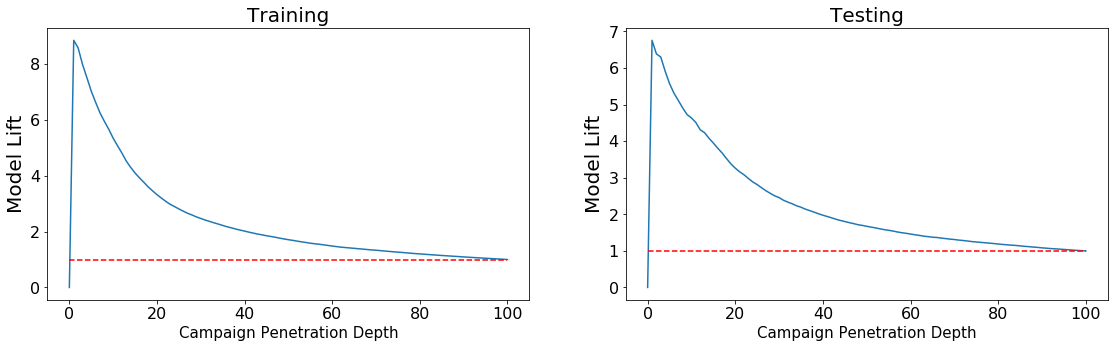

In [99]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['cum lift'])
ax.plot([0, 100], [1, 1],'r--')
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Model Lift',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['cum lift'])
ax1.plot([0, 100], [1, 1],'r--')
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Model Lift',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

Text(0.5, 0, 'Campaign Penetration Depth')

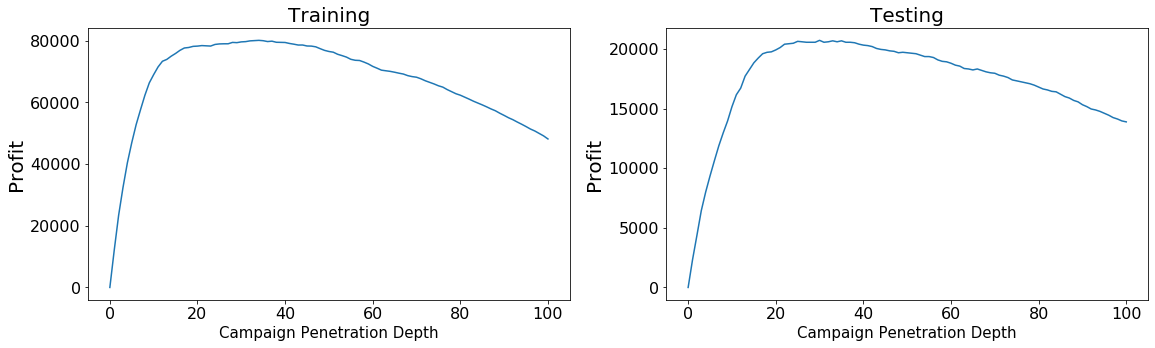

In [100]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['profit'])
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Profit',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['profit'])
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Profit',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

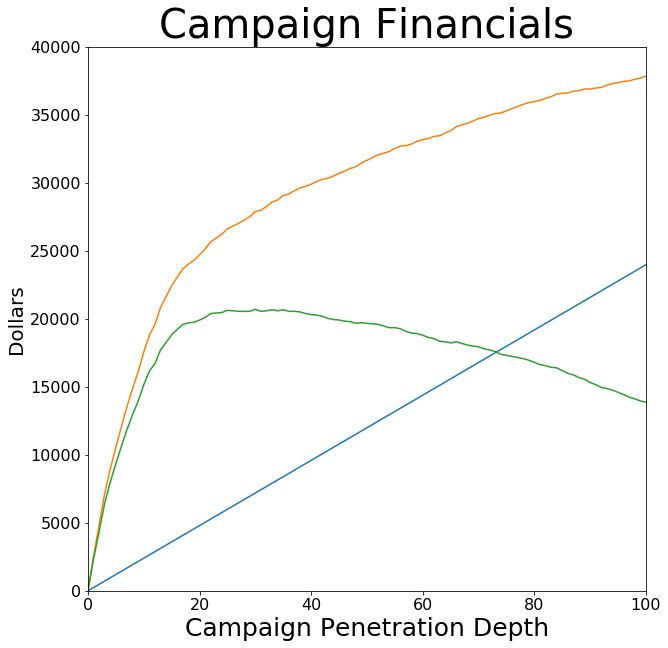

In [101]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(lift_tst['bin'], lift_tst['cost'])
ax.plot(lift_tst['bin'], lift_tst['revenue'])
ax.plot(lift_tst['bin'], lift_tst['profit'])
# ax.plot(lift_tst['bin'], lift_tst['cum lift'])
# ax.plot([0, 100], [1, 1],'r--')
ax.set_title('Campaign Financials',fontsize=40)
ax.set_ylabel('Dollars',fontsize=20)
# ax.set_title('Model Lift',fontsize=40)
ax.set_xlabel('Campaign Penetration Depth',fontsize=25)
ax.set_xlim(0,100)
ax.set_ylim(0,40000)
plt.savefig('financials.png')
# plt.savefig('lift curve.png')

In [102]:
print('Model is', col_eval, '   Max profit is',lift_profit_tst_max, '   Lift in the ',lift_bin,'th bin is', lift_tst.loc[lift_bin,'cum lift'])

Model is GBT    Max profit is 20723.0    Lift in the  20 th bin is 3.2621198521647305


20683, 20643.0

In [103]:
print('Notebook duration: ',datetime.now() - start_time)

Notebook duration:  0:38:50.099806
